# **Problem set 3** - Machine Learning for Physics and Astronomy 2023/2024, UvA



## Kaya Han Taş - 15064735 (Astronomy & Astrophysics)

- The total sheet gives 27 points
- Deadline for submitting your results is **Wed, 24/04/2024, 23:59**
- **IMPORTANT**: Specify if/how AI was used to solve the exercises by filling the corresponding "Usage of AI" comments. Anything between "No" (if applicable) and a short paragraph reflecting how AI was used is fine. Failing to do so faithfully will result in the substraction of points.

## Chapter 5: Gaussian Process Regression (14 points)

### 5.1 Gaussian process regression analytically (4 points)

Let us consider a Gaussian process regression problem with an uncommon but simple kernel function, the constant $\kappa\left(x, x^{\prime}\right)=1$ (as usual, the mean function is $\mu(x)=0$ ). Let us assume we have measurements at two points $x=-1.0, 0.0$, and these measurements are $y=-0.2,0.1$. We can assume measurement uncertainties of $\sigma=0.1$.

1. (4pt) Derive the predicted value of $y$ at $x=0.2$, both in terms of mean value and variance. Do this fully analytically.

### Answer:

* First of all, let's discuss what is given to us in the question.

* $\kappa(x, x^\prime) = 1$:
    * **Kernel Function**
    * **Defines the Covariance between input values $x$ and $x^\prime$!**
    * **If we put the same values into the Kernel Function, we would get Variance instead of Covariance!**
    * Normally it is not constant.

* $\mu(x) = 0$:
    * **The Mean Function**
    * **Typically taken as zero for Gaussian Processes!**

* $x = -1.0, 0.0$:
    * $x$ values we have.

* $y = -0.2, 0.1$:
    * $y$ values that correspond to the $x$ values above respectively.
    * It is basically $f(x)$!

* $\sigma = 0.1$:
    * **Measurement Uncertainties/Standard Deviation**
    * **Square of it will give us the Variance!**

* Since this is **Gaussian Process Regression with Noise** we can write the following formulas. *(Lecture 5, Slide 17)*
$$ y = f(\boldsymbol{x}) + \epsilon $$
$$ \epsilon \sim \mathcal{N}(0, \sigma_y^2) $$
<h5><center>$\epsilon$ is the error/noise on our observations!</h5>

* We denote our new point, $x = 0.2$, as $x_*$!
* From here we can write the **Mean and Variance** as follows: *(Lecture 5, Slide 17)*

$$ \mu_* = \boldsymbol{K_*}^T \boldsymbol{K_y}^{-1} \boldsymbol{f} $$
$$ \Sigma_* = \boldsymbol{K_{**}} - \boldsymbol{K_*}^T \boldsymbol{K_y}^{-1} \boldsymbol{K_*} $$

* **In here**:
    * $\boldsymbol{K_*}$: **Vector of Covariances between the new point $x_*$ and the observed points $x_1, x_2$!** **$$\boldsymbol{K_*} = \kappa(x,x_*)$$**
    * $\boldsymbol{K_{**}}$: **Covariance between the new point $x_*$ and itself i.e. $x_*$!** **$$\boldsymbol{K_{**}} = \kappa(x_*,x_*)$$**
    * $\boldsymbol{K_y}$: **Covariance Matrix of the Observed Points/Training Data $x_1, x_2$!** **$$\boldsymbol{K_{y}} = \kappa(x,x)$$**
    * $\boldsymbol{f}$: **Basically the $y = f(x)$ values as a vector, but denoted as $\boldsymbol{f}$!** **$$\boldsymbol{f} = y = f(x)$$**

* In here **$\boldsymbol{K_y}$ i.e. the Covariance Matrix of the Observed Points/Training Data has an additional Noise Term**:

$$ \boldsymbol{K_y} = \boldsymbol{K} + \sigma^2_y \boldsymbol{I} $$

* **In here:**
    * $\boldsymbol{K}$: **Covariance Matrix of the Observed Points/Training Data $x_1, x_2$!**
    * $\sigma^2_y \boldsymbol{I}$: **Noise Term that is added to the Covariance Matrix!** ($I$: Identity Matrix)
        * Note that **without the $\sigma$ we are back to the Noiseless case!**

* Now we put this equation into our **Mean and Variance** equations as follows:

$$ \mu_* = \boldsymbol{K_*}^T \left(\boldsymbol{K} + \sigma^2_y \boldsymbol{I}\right)^{-1} \boldsymbol{f} $$
$$ \Sigma_* = \boldsymbol{K_{**}} - \boldsymbol{K_*}^T \left(\boldsymbol{K} + \sigma^2_y \boldsymbol{I}\right)^{-1} \boldsymbol{K_*} $$

* We have now derived and given all the formulas we need.
* Now let's talk about what is given to us and what we will do.

* **Our Goal is to find $y$ at $x_{*} = 0.2$:**
    * 1-) **The Kernel Function we have picked is constant:** $$\kappa(x, x^\prime) = 1$$
    * 2-) **Since Kernel Function gives us the Covariance between two points, the Covariances we have are also constant and equal to 1:**
$$\boldsymbol{K_*} = \begin{bmatrix} \kappa(x_1, x_*) \\ \kappa(x_2, x_*) \end{bmatrix}$$
$$\boldsymbol{K_*} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$
<h5><center>(Covariances between $x_*$ and observed points $x_1$, $x_2$ hence the matrix $2 \times 1$ dimensional matrix!)</h5> 
<h5><center>and</h5> 
$$\boldsymbol{K_{**}} = \kappa(x_*, x_*)$$
$$\boldsymbol{K_{**}} = 1$$
<h5><center>(Covariance of the $x_*$ with $x_*$, which is equal to 1, basically $1 \times 1$ dimensional matrix!)</h5>
    * 3-) **The Covariance Matrix of the Observed Points $x_1$ and $x_2$ will become a matrix with all of its elements equal to 1:** 
$$ K = \begin{bmatrix} \kappa(x_1, x_1) & \kappa(x_1, x_2) \\ \kappa(x_2, x_1) & \kappa(x_2, x_2) \end{bmatrix}$$ 
<h5><center>Since from the Kernel Function we know that the Covariance between two points is 1:</h5> 
$$ K = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}$$
    * 4-) **We plug these Matrices into the Mean ($\mu_*$) and Variance ($\Sigma_*$) formulas alongside the values given in the question.**
$$x_{*} = 0.2$$
$$\kappa(x, x^\prime) = 1$$
$$\boldsymbol{K_*} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$
$$\boldsymbol{K_{**}} = 1$$
$$ K = \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}$$
$$x = \left[-1.0, 0.0\right]$$
$$y = \left[-0.2, 0.1\right]$$ 
$$\sigma = 0.1$$
$$\sigma^2 = 0.01$$
    * 5-) **We calculate the Predictive Mean and Variance!** 
    * 6-) **We get predict the $y$ value at $x = 0.2$!**

* First we calculate the **Predictive Mean $\mu_*$** as follows:

$$ \mu_* = \boldsymbol{K_*}^T \left(\boldsymbol{K} + \sigma^2_y \boldsymbol{I}\right)^{-1} \boldsymbol{f} $$
<h5><center> We plug the expressions into the formula.</center></h5>
$$ \mu_* = \begin{bmatrix} 1 \\ 1 \end{bmatrix}^T \left(\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} + \sigma^2_y \boldsymbol{I}\right)^{-1} \boldsymbol{\begin{bmatrix} -0.2 \\ 0.1 \end{bmatrix}} $$
<h5><center> We take the Transpose of the first Matrix.</center></h5>
$$ \mu_* = \left[1, 1\right] \left(\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} + \sigma^2_y \boldsymbol{I}\right)^{-1} \boldsymbol{\begin{bmatrix} -0.2 \\ 0.1 \end{bmatrix}} $$
<h5><center> We only add the noise diagonally to preserve the original covariance structure of the Gaussian Process while modelling with the noise for each observed data point.</center></h5>
<h5><center> For that reason, we only add the noise to the $k(x_1, x_1)$ and $k(x_2, x_2)$ since they don't represent the covariances!</center></h5>
<h5><center> TLDR: Due to the Identity Matrix $I$, we add $\sigma^2$ as follows:</center></h5>
$$ \mu_* = \left[1, 1\right] \begin{bmatrix} 1 + \sigma^2 & 1 \\ 1 & 1 + \sigma^2 \end{bmatrix}^{-1} \boldsymbol{\begin{bmatrix} -0.2 \\ 0.1 \end{bmatrix}} $$
$$ \mu_* = \left[1, 1\right] \begin{bmatrix} 1.01 & 1 \\ 1 & 1.01 \end{bmatrix}^{-1} \boldsymbol{\begin{bmatrix} -0.2 \\ 0.1 \end{bmatrix}} $$
<h5><center> We take the Inverse Matrix as follows. </center></h5>
<h5><center> $\left([[a,b][c,d]] => 1/(ad-bc)[ [d,-b][-c,a] ]\right)$ </center></h5>
$$ \mu_* = \left[1, 1\right] \frac{1}{(1.01 \times 1.01) - (1 \times 1)} \begin{bmatrix} 1.01 & -1 \\ -1 & 1.01 \end{bmatrix} \boldsymbol{\begin{bmatrix} -0.2 \\ 0.1 \end{bmatrix}} $$
$$ \mu_* = \left[1, 1\right] \frac{1}{0.0201} \begin{bmatrix} 1.01 & -1 \\ -1 & 1.01 \end{bmatrix} \boldsymbol{\begin{bmatrix} -0.2 \\ 0.1 \end{bmatrix}} $$
$$ \mu_* = \left[1, 1\right] \begin{bmatrix} 50.2488 & -49.7512 \\ -49.7512 & 50.2488 \end{bmatrix} \boldsymbol{\begin{bmatrix} -0.2 \\ 0.1 \end{bmatrix}} $$
<h5><center> We do the Matrix Multiplication between 2nd and 3rd term. </center></h5>
$$ \mu_* = \left[1, 1\right] \begin{bmatrix} -(0.2)\times(50.2488) + (0.1) \times (-49.7512) \\ -(-0.2)\times(-49.7512) + (0.1) \times (50.2488) \end{bmatrix} $$
$$ \mu_* = \left[1, 1\right] \begin{bmatrix} -15.02488 \\ 14.97512 \end{bmatrix} $$
<h5><center> We finally do the Matrix Multiplication between 1st and 2nd term. </center></h5>
$$ \mu_* = -15.02488 + 14.97512 $$
$$ \mu_* = -0.04976 $$

* Now we calculate the **Predictive Variance $\sigma_*^2$** as follows:

$$ \Sigma_* = \boldsymbol{K_{**}} - \boldsymbol{K_*}^T \left(\boldsymbol{K} + \sigma^2_y \boldsymbol{I}\right)^{-1} \boldsymbol{K_*} $$
<h5><center> We plug the expressions into the formula.</center></h5>
$$ \Sigma_* = 1 - \begin{bmatrix} 1 \\ 1 \end{bmatrix}^T \left(\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} + \sigma^2_y \boldsymbol{I}\right)^{-1} \begin{bmatrix} 1 \\ 1 \end{bmatrix} $$
<h5><center> We take the Transpose of the first Matrix.</center></h5>
$$ \Sigma_* = 1 - \left[1, 1\right] \left(\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} + \sigma^2_y \boldsymbol{I}\right)^{-1} \begin{bmatrix} 1 \\ 1 \end{bmatrix} $$
<h5><center> We only add the noise diagonally to preserve the original covariance structure of the Gaussian Process while modelling with the noise for each observed data point.</center></h5>
<h5><center> For that reason, we only add the noise to the $k(x_1, x_1)$ and $k(x_2, x_2)$ since they don't represent the covariances!</center></h5>
<h5><center> TLDR: Due to the Identity Matrix $I$, we add $\sigma^2$ as follows:</center></h5>
$$ \Sigma_* = 1 - \left[1, 1\right] \begin{bmatrix} 1 + \sigma^2 & 1 \\ 1 & 1 + \sigma^2 \end{bmatrix}^{-1} \begin{bmatrix} 1 \\ 1 \end{bmatrix} $$
$$ \Sigma_* = 1 - \left[1, 1\right] \begin{bmatrix} 1.01 & 1 \\ 1 & 1.01 \end{bmatrix}^{-1} \boldsymbol{\begin{bmatrix} 1 \\ 1 \end{bmatrix}} $$
<h5><center> We take the Inverse Matrix as follows. </center></h5>
<h5><center> $\left([[a,b][c,d]] => 1/(ad-bc)[ [d,-b][-c,a] ]\right)$ </center></h5>
$$ \Sigma_* = 1 - \left[1, 1\right] \frac{1}{(1.01 \times 1.01) - (1 \times 1)} \begin{bmatrix} 1.01 & -1 \\ -1 & 1.01 \end{bmatrix} \boldsymbol{\begin{bmatrix} 1 \\ 1 \end{bmatrix}} $$
$$ \Sigma_* = 1 - \left[1, 1\right] \frac{1}{0.0201} \begin{bmatrix} 1.01 & -1 \\ -1 & 1.01 \end{bmatrix} \boldsymbol{\begin{bmatrix} 1 \\ 1 \end{bmatrix}} $$
$$ \Sigma_* = 1 - \left[1, 1\right] \begin{bmatrix} 50.2488 & -49.7512 \\ -49.7512 & 50.2488 \end{bmatrix} \boldsymbol{\begin{bmatrix} 1 \\ 1 \end{bmatrix}} $$
<h5><center> We do the Matrix Multiplication between 2nd and 3rd term. </center></h5>
$$ \Sigma_* = 1 - \left[1, 1\right] \begin{bmatrix} 1\times(50.2488) + 1 \times (-49.7512) \\ 1\times(-49.7512) + 1 \times (50.2488) \end{bmatrix} $$
$$ \Sigma_* = 1 - \left[1, 1\right] \begin{bmatrix} 0.4976 \\ 0.4976 \end{bmatrix} $$
<h5><center> We finally do the Matrix Multiplication between 1st and 2nd term. </center></h5>
$$ \Sigma_* = 1 - (0.4976 + 0.4976) $$
$$ \Sigma_* = 1 - (0.9952) $$
$$ \Sigma_* = 0.0048 $$

* **From here the Predicted Value of $y$ at $x = 0.2$ is:**
    * $\mu_* = -0.04976$
    * $\Sigma_* = 0.0048$
    * $y = -0.04976 \pm 0.0048$

**Usage** of AI: *Got help to understand the steps, going through the formulas and calculation.*

### 5.2 Gaussian process regression with Numpy  (10 points)

**Reading Material: Murphy 15.1 + 15.2 (up to and including 15.2.3)**

In this exercise, we will be implementing the Gaussian process regression formalism discussed in class.  

Suppose we observe a training set $(\mathbf{x}_i, f_i)$ with $i = 1, \ldots, N$ and where $f_i = f(\mathbf{x}_i)$ is a noise-free observation of the function evaluated at $\mathbf{x}_i$. Each $\mathbf{X}$ has dimensionality $D$. Below is just such a set, with $D = 1$ and $N = 20$.


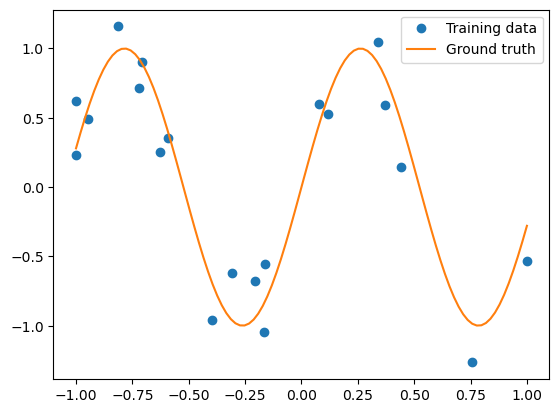

In [1]:
# provided data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x_i = np.random.uniform(-1., 1., 20)
x_i[0] = -1
x_i[-1] = 1
f_i = np.sin(x_i*6)
y_i = f_i + np.random.randn(20)*0.3
x_true = np.linspace(-1, 1, 100)
f_true = np.sin(x_true*6)

plt.plot(x_i, y_i, 'o', label = 'Training data')
plt.plot(x_true, f_true, label = "Ground truth")
plt.legend()

1. **(1pt)** Array preparations
- We need to reformat the training set as $\mathbf{X}$, a $N \times D$ matrix. Reshape the provided $x_i$ set into an $N \times D$ numpy array. Reshape the f_i values into a variable named F, with shape $N \times 1$.
- We will want to evaluate whatever  function we learn using the GP at inputs $\mathbf{X}_*$, with size $N_* \times D$ and predict outputs $\mathbf{f}_*$. In this example, let's predict 100 evenly spaced values for $\mathbf{X}_*$ from -1 to 1, so that when we plot the learned function later, it looks almost continuous. This is our *test* set. Define the variable `X_test` with these specifications, taking care to make it the right shape.

### Answer:

* We will first talk about the code given in the question and explain it with comments.
* Then we will move onto the Array Preparations.
* Note that GP stands for Gaussian Process in the question.

In [2]:
#We will use the given data on the question.
#For that reason we write that block of code once again for completeness.
import numpy as np
import matplotlib.pyplot as plt

#We take a random seed.
#This helps us to keep xi, fi, yi to be the same each time we run the code!
#So the code does not define new random variables each time we run the code!
np.random.seed(1)

#We get the xi values by using np.random.uniform()!
#We get 20 samples between -1 and 1 as follows.
x_i = np.random.uniform(-1., 1., 20)

#We define the first and the last index of the xi values as -1 and 1 respectively.
x_i[0] = -1
x_i[-1] = 1

#We define a Noise-Free Observation function.
#This is the "Underlying Model" of our observations without the noise.
#We find the function value at each xi as follows.
#Note that we do this to get the yi values.
f_i = np.sin(x_i*6)

#Now we add RANDOM NOISE to our observations! 
#This gives us our Training Data!
y_i = f_i + np.random.randn(20)*0.3

#Now we define the true x values to get a complete fit.
#This is basically our "Underlying Model" of our observations.
#This time we use it to show it on the plot, unlike the last time where we calculated yi values.
x_true = np.linspace(-1, 1, 100)
f_true = np.sin(x_true*6)

#Now our goal is to reshape the xi and fi arrays.

#First we reshape the x_i array into an array called X with NxD dimensions!
#We use .reshape() to convert our 1 Dimensional array to 2 Dimensional array.
    #We use "-1" to infer the size of first dimension (rows) of our new array, from the length of the input 
#array we have which would give us the Dimension N = 20.
    #We use "1" to indicate the second dimension (columns) of our new array, which will reshape the array to 
#contain 1 element per row.
X = x_i.reshape(-1, 1)

#We print both arrays to see if have the correct dimensions/shape!
print(90 * "-")
print("Original Array: ", "\n", x_i)
print(90 * "-")
print("Reshaped Array (N x D): ", "\n", X)
print(90 * "-")

#Now we reshape the f_i array into an array called F with Nx1 Dimensions!
#For this we use .reshape() just like we used it for x_i array!
F = f_i.reshape(-1, 1)

#We print both arrays to see if have the correct dimensions/shape!
print(90 * "-")
print("Original Array: ", "\n", f_i)
print(90 * "-")
print("Reshaped Array (N x D): ", "\n", F)
print(90 * "-")

#Now we define our Test Data/Set!
#For this, we define 100 evenly spaces values from -1 to 1 as follows.
X_test = np.linspace(-1, 1, 100)

#We again have to reshape the dataset by using .reshape() as follows.
X_test = X_test.reshape(-1, 1)

------------------------------------------------------------------------------------------
Original Array:  
 [-1.          0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
 -0.62747958 -0.30887855 -0.20646505  0.07763347 -0.16161097  0.370439
 -0.5910955   0.75623487 -0.94522481  0.34093502 -0.1653904   0.11737966
 -0.71922612  1.        ]
------------------------------------------------------------------------------------------
Reshaped Array (N x D):  
 [[-1.        ]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]
 [-0.62747958]
 [-0.30887855]
 [-0.20646505]
 [ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]
 [-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]
 [-0.1653904 ]
 [ 0.11737966]
 [-0.71922612]
 [ 1.        ]]
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Original Array:  
 [ 0.2794155   0.47740472  0

2. **(2pt)** Implementation of kernel function

**Background information and assumptions**: Remember from the lectures that the full joint distribution of the training set $\mathbf{f}$ and test set $\mathbf{f_*}$ is given by

   $$
\left(\begin{array}{c}
\mathbf{f} \\
\mathbf{f}_{*}
\end{array}\right) \sim \mathcal{N}\left(\left(\begin{array}{c}
\boldsymbol{\mu} \\
\boldsymbol{\mu}_{*}
\end{array}\right),\left(\begin{array}{cc}
\boldsymbol{K} & \boldsymbol{K}_{*} \\
\boldsymbol{K}_{*}^{T} & \boldsymbol{K}_{* *}
\end{array}\right)\right)
$$

where $\mathbf{K} = \kappa (\mathbf{X}, \mathbf{X})$ is an $N \times N$ matrix, $\mathbf{K}_* = \kappa (\mathbf{X}, \mathbf{X}_*)$ is an $N \times N_*$ matrix, and $\mathbf{K}_{**} = \kappa (\mathbf{X}_*, \mathbf{X}_*)$ is an $N_* \times N_*$ matrix, based on the kernel function $\kappa( . )$.

For this exercise, we will use the **radial basis function** (RBF) kernel, given by
$$
\kappa\left(\mathbf{x}_i, \mathbf{x}_i^{\prime}\right)= \alpha^2 \exp \left(-\frac{\left\|\mathbf{x}_i-\mathbf{x}_j\right\|^{2}}{2 l^{2}}\right)\;.
$$
(we have renamed the bandwidth parameter to be $l$ instead of the $\sigma$ in class because another $\sigma$ will enter the story later). The double bars indicate the Euclidean distance. We also introduced the parameter $\alpha$. Note that$\alpha^2$ corresponds to the variance of the GP.

The kernel function $\kappa$ recieves two points $\mathbf{x}_i$ and $\mathbf{x}_j$ and returns the function evaluated at those points. But we will need to define $\mathbf{K}$, a matrix which will have dimensions that are "total amount of $\mathbf{x}_i$'s $\times$  total amount of $\mathbf{x}_j$'s". So, just this once, I will encourage you to do something in an actual nested for-loop (just this once!) for the sake of clarity. Every other time in this course, please vectorize your functions.

**Task**: Implement the following functions. `kappa(x_i, x_j, l, alpha)` should return an element-wise comparison of two individual examples $\mathbf{x}_i$ and $\mathbf{x}_j$. `Kernel(X1, X2)` should return the full matrix $\mathbf{K}$ and should be implemented with two nested for-loops.

### Answer:

In [3]:
def kappa(x_i, x_j, l, alpha):
    """Takes two input points (xi and xj), the bandwidth parameter (l) and the
    standard deviation of the Gaussian Process (alpha). Calculates the Radial 
    Basis Function (RBF) Kernel values for the given input point set (xi, xj) 
    and returns the Kernel value for them as a numpy array.
    
    Input:
    ----------------------------------------------------------------------------
    x_i: First Input Point.
    x_j: Second Input Point.
    l: Bandwidth Parameter
    alpha: Standard Deviation of the Gaussian Process (Square of it is the 
    Variance of Gaussian Process)
    
    Output:
    ----------------------------------------------------------------------------
    kernel_value: Numpy Array containing the calculated RBF Kernel Value for
    given (xi, xj) set.
    
    """

    #We first calculate the Euclidean Distance ||x_i - x_j|| as follows.
    euclidean_distance = np.linalg.norm(x_i - x_j)

    #We then use the Kernel Formula thats given on the question to calculate the get
    #the Kernel Value/Covariance Value for each point set.
    kernel_value = alpha**2 * np.exp(- ( (euclidean_distance**2) / (2 * l**2)))
    
    return kernel_value

def Kernel(X1, X2, l, alpha):
    """Takes two sets of input points (X1 and X2) that contains the xi and xj
    points, the bandwidth parameter (l) and the standard deviation of the Gaussian 
    Process (alpha). Calculates the Radial Basis Function (RBF) Kernel values for 
    each input point pairs and returns the Kernel Matrix "K" as a numpy array.
    
    Input:
    ----------------------------------------------------------------------------
    X1: First SET of Input Points containing the xi values.
    X2: Second SET of Input Points containing the xj values.
    l: Bandwidth Parameter
    alpha: Standard Deviation of the Gaussian Process (Square of it is the 
    Variance of Gaussian Process)
    
    Output:
    ----------------------------------------------------------------------------
    K: The Kernel Matrix containing all possible xi and xj pair's kernel 
    values with (Total amounts of "xi" x Total amounts of "xj") dimensions.
    
    """

    #We know that the Kernel Matrix "K" should have the dimensions total amounts
    #of xi and total amounts of xj from the theory given in the question.
    #From here we can define an empty Kernel Matrix as follows.
    K = np.zeros((X1.shape[0], X2.shape[0]))

    #Now we can calculate the Kernel value per xi, xj pair by using our "kappa"
    #function we have defined beforehand.
    #We create a loop to go over all xi and xj pairs.
    for xi in range(X1.shape[0]):
        for xj in range(X2.shape[0]):
            #We calculate the Kernel Value for our current (xi, xj) pair!
            K[xi, xj] = kappa(X1[xi], X2[xj], l, alpha)
    
    return K

3. **(1pt)** With our kernel function in hand, let's make a plot of what it looks like! Viusalize the kernel array evaluated for all values in X_test (with X_test inputed twice) using the `plt.imshow()` function for a few (~3) reasonable values of $l$. What does the $l$ parameter represent, intuitively?  [Read about plt.imshow here.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

### Answer:

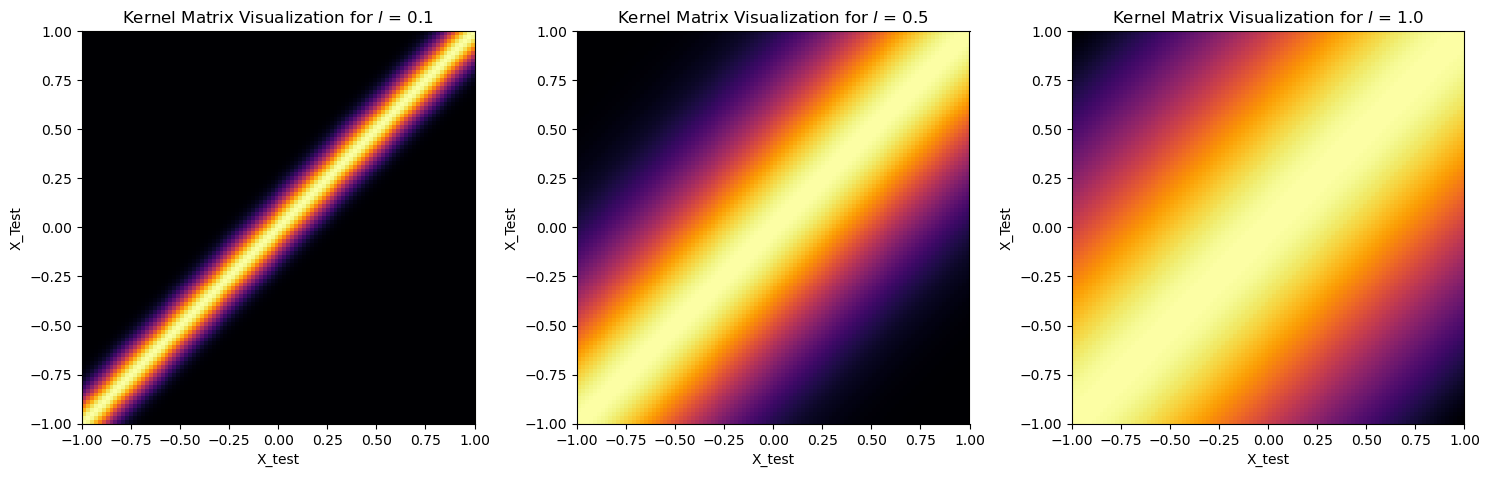

In [4]:
#Our goal is to use the Kernel Function with different values of Bandwidth Parameter l.
#For that reason, we first define a list consisting of different l values.
l_list = [0.1, 0.5, 1.0]

#We also define a list to store all the Kernel Matrices for different l values.
kernel_list = []

#Now we do a for loop over l values to get our Kernel Matrices.
#Note that as stated in the question, we'll put X_test for both X1 and X2!
for l in l_list:
    kernel_matrix = Kernel(X_test, X_test, l, alpha = 1)
    kernel_list.append(kernel_matrix)

#Now we define a figure and its axes to plot our Kernel Matrices.
#We use the length of l_list to define the number of plots we will get depending on number of l values.
figure, axes = plt.subplots(1, len(l_list), figsize = (15, 5))

#Now we loop over l values and kernel matrices to plot them individually.
for i, (l, kernel_matrix) in enumerate(zip(l_list, kernel_list)):
    #We use plt.imshow() to show the Kernel Matrix as an image.
        #extent: Defined to be between -1 and 1 for both x and y axes since X_test values are in that range!
        #origin: Defined as "lower" to get the [0,0] index of the array to be at bottom-left.
        #cmap: Colors used to mapout the Kernel Matrices, can be used as a different colormap as well.
    axes[i].imshow(kernel_matrix, extent = (-1, 1, -1, 1), origin = "lower", cmap = "inferno")

    #We set the Title of the Plot and Labels of the Axes.
    axes[i].set_title(f"Kernel Matrix Visualization for $l$ = {l}")
    axes[i].set_xlabel("X_test")
    axes[i].set_ylabel("X_Test")

plt.tight_layout()
plt.show()

*What does the $l$ parameter represent, intuitively?*

$$
\kappa\left(\mathbf{x}_i, \mathbf{x}_i^{\prime}\right)= \alpha^2 \exp \left(-\frac{\left\|\mathbf{x}_i-\mathbf{x}_j\right\|^{2}}{2 l^{2}}\right)\;.
$$
* In the plot:
    * The bright/colored parts represent the **correlated (or similar) points** in the Kernel Matrix!
    * The dark parts represent the **less correlated/not correlated points** in the Kernel Matrix!

* We can see that as **$l$ i.e. the Bandwidth Parameter goes up** **the width of the Range of Correlated Points go up!**
* So we can say that **$l$ represents the correlation restriction between two points!**
* **$l$ determines the Characteristic Distance (Euclidean Distance) between two points in order for them to be considered Correlated!!!**

* ***$l$ is Low:***
    * **It is a stricter restriction!**
    * **Characteristic distance of two points should be small in order for them to be considered correlated!**
    * Mathematically:
        * The exponent goes down as $l$ gets lower (due to the "-" sign).
        * As a result, the correlation becomes really small **unless the characteristic distance of two points is small!**

* ***$l$ is High:***
    * **It is a looser restriction!**
    * **Characteristic distance of two points could be large but they can still be considered correlated!**
    * Mathematically:
        * The exponent goes up as $l$ gets higher (due to the "-" sign).
        * As a result, the correlation becomes really large **regardless of the characteristic distance of two points!**

* **Note:** In here *characteristic distance* is the *Euclidean Distance* i.e. $\left\|\mathbf{x}_i-\mathbf{x}_j\right\|$.

4. **(2pt)** Now it's time for Gaussian process regression!

Let's start with a recap.

**Noise-free case**. In the absence of measurement noise, the distribution of function values $\mathbf{f}_\ast$ at points $\mathbf{X}_\ast$, conditioned on training data $\mathbf{X}$ and observed function values $\mathbf{f}$, is given by $\mathbf{f}_* \sim \mathcal{N}(\mathbf{f}_*| \boldsymbol{\mu}_*,\boldsymbol{\Sigma}_*)$, where
$$
\boldsymbol{\mu}_{*}=\boldsymbol{K}_{*}^{T} \boldsymbol{K}^{-1} \mathbf{f} \quad \text { and } \quad \boldsymbol{\Sigma}_{*}=\boldsymbol{K}_{* *}-\boldsymbol{K}_{*}^{T} \boldsymbol{K}^{-1} \boldsymbol{K}_{*}
$$
and where
$$
\mathbf{K}=\kappa(\mathbf{X}, \mathbf{X}), \mathbf{K}_{*}=\kappa\left(\mathbf{X}, \mathbf{X}_{*}\right), \text { and } K_{* *}=\kappa\left(\mathbf{X}_{*}, \mathbf{X}_{*}\right)
$$
based on the kernel function $\kappa(\cdot, \cdot)$.

Remember that $\mathbf{f}_* \sim \mathcal{N}(\mathbf{f}_*| \boldsymbol{\mu}_*,\boldsymbol{\Sigma}_*)$ implicitely defines a posterior over **functions**, since we are free to chose $\mathbf{X}_\ast$.

**Noisy case**.  Suppose that we observe now a noisy version of the underlying function.
   $$y = f(\mathbf{X}) + \epsilon \\ \text{ where } \\ \epsilon \sim \mathcal{N}(0, \sigma_y^2)$$
The above discussion remains untouched, except that the mean and covariance are in this case given by$$
\boldsymbol{\mu}_{*}=\boldsymbol{K}_{*}^{T} \boldsymbol{K}_{y}^{-1} \mathbf{f} \quad \text { and } \quad \boldsymbol{\Sigma}_{*}=\boldsymbol{K}_{* *}-\boldsymbol{K}_{*}^{T} \boldsymbol{K}_{y}^{-1} \boldsymbol{K}_{*}
$$
where now the covariance of the training data has an additional noise term,
$$
\mathbf{K}_{y} \equiv \mathbf{K}+\sigma_{y}^{2} \mathbf{I}_{N}
$$

**Your Task**

- Implement the function `posterior` below. `x_test` will be $\mathbf{X}_*$, `x_train` is $\mathbf{X}$ and `t_train` will be the corresponding training values $f(\mathbf{x}_i)$, `l` is the bandwidth parameter and `alpha` the (square root of the) variance of the RBF kernel.  Furthermore, `sigma_y` is the noise.
- The function should return the values (1) $\boldsymbol{\mu}_*$, (2)  $\boldsymbol{\Sigma}_*$, i.e. the parameters over the multivariate Gaussian posterior, and (3) the log marginal likelihood (see lecture slides).
   
   Hints: This function should not be long (max 10 lines), now that you have your kernel function in hand. If it is a long function, you may be doing something wrong. As a debugging tip: you can verify that you have the correct dimensions for $\mathbf{K}$, $\mathbf{K}_*$, and $\mathbf{K}_{**}$ by calling `print(K.shape)`.


### Answer:

* In the lecture slides the **Log Marginal Likelihood** formula is given as follows:

$$ \ln{P(\boldsymbol{f}|\boldsymbol{X})} = \ln{N(\boldsymbol{f}|\boldsymbol{0}, \boldsymbol{K_y})} = -\frac{1}{2} \boldsymbol{f^T} \boldsymbol{K_y}^{-1} \boldsymbol{f} - \frac{1}{2}\ln{\boldsymbol{\left|K_y\right|}} - \frac{N}{2}\ln{2\pi}$$
<h5><center> The Log Marginal Likelihood Formula </h5>
<h5><center> (In the slides $f$ is given as $y$!) </h5>
<h5><center> ($\boldsymbol{\left|K_y\right|}$ is the Determinant of the $\boldsymbol{K_y}$ Matrix!) </h5>
<h5><center> ($N$ is the Number of Training Data Points i.e. $\boldsymbol{X}$) </h5>

* Now we can write our function.

In [5]:
def posterior(x_test, x_train, t_train, l, sigma_y, alpha):
    """Takes the Test Data "X*" (x_test), the Training Data "X" (x_train), the
    Corresponding Training Values "f" (t_train), the Bandwidth Parameter "l", 
    the Noise "sigma_y" and the Standard Deviation of the Gaussian Process 
    "alpha". Calculates and returns the Predicted Mean "mu_star", Predicted
    Covariance Values "sigma_star", log Marginal Likelihood "log_marginal_likelihood" 
    as arrays.
    
    Input:
    ----------------------------------------------------------------------------
    x_test: The test data as an array, also known as X* in the formulas.
    x_train: The training data as an array, also known as X in the formulas.
    t_train: Corresponding Training Values f(xi), also known as f in the formulas.
    l: Bandwidth Parameter
    sigma_y: The amount of noise on the observations.
    alpha: Standard Deviation of the Gaussian Process (Square of it is the 
    Variance of Gaussian Process)
    
    Output:
    ----------------------------------------------------------------------------
    mu_star: Numpy Array containing the Predicted Mean values for given x_test
    and x_train pair.
    sigma_star: Numpy Array containing the Predicted Covariance Values for given
    x_test and x_train pair.
    log_marginal_likelihood: Numpy Array containing the Log Marginal Likelihood 
    for given x_test and x_train pair.
    
    """
    #Note that we use the following definitions:
        #X* = x_test
        #X = x_train
        #f(xi) = f = t_train
    
    #We first compute the K Matrix.
    K = Kernel(x_train, x_train, l, alpha)

    #We then compute the K* Matrix.
    K_star = Kernel(x_train, x_test, l, alpha)

    #Finally, we compute the K** Matrix
    K_star_star = Kernel(x_test, x_test, l, alpha)

    #We then compute the Ky matrix i.e. the K matrix with error/noise included!
    #Note that "I" term in the formulas above represent an Identity Matrix.
    #To create an Identity Matrix, we can use the np.eye() function from Numpy.
    #We use the length of our Training Data (X) to get the Shape of the Identity Matrix.
    K_y = K + sigma_y**2 * np.eye(len(x_train))

    #Now that we have everything we need, we can just calculate Predictive Mean "mu_star".
    mu_star = np.dot(np.dot(K_star.T, np.linalg.inv(K_y)), t_train)

    #We can also calculate Predictive Variance "sigma_star" as follows.
    sigma_star = K_star_star - np.dot(np.dot(K_star.T, np.linalg.inv(K_y)), K_star)

    #Finally, we calculate the Log Marginal Likelihood as follows.
    log_marginal_likelihood = (-(1/2 * np.dot(np.dot(t_train.T, np.linalg.inv(K_y)), t_train)) 
                               -(1/2 * np.log(np.linalg.det(K_y)))
                               -(len(x_train)/2 * np.log(2 * np.pi)))
    
    return mu_star, sigma_star, log_marginal_likelihood

5. **(2pt)** Run your posterior function on the training data provided earlier in this exercise, using `l=0.1`, `alpha = 0.5` and `sigma_y=0.3`, and plot the results.

- Plot 3 samples of the resulting function from the posterior on the same plot as the original training data.
- Plot the $2\sigma$ uncertainty band, all in the same one plot.
- Describe in some detail the certain vs uncertain regions of the plot. Connect back to the material discussed in class.

Notes: You can produce samples by calling `np.random.multivariate_normal`.  [You can read documentation about this function here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html). *Note the types of dimensions that this function needs for the input parameters.*

   The $2 \sigma$ uncertainty interval of the multivariate Gaussian can be calculated as `2*np.sqrt(np.diag(cov))`. Use this value to plot the uncertainty region for your posterior. The function [plt.fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) might be useful here.


### Answer:

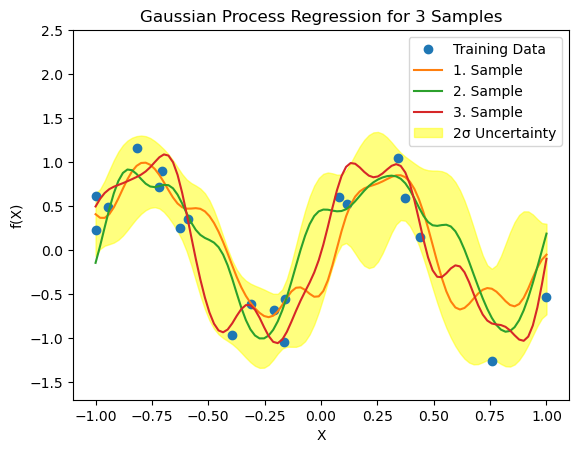

In [6]:
#Using l = 0.1, alpha = 0.5 and sigma_y = 0.3, alongside our dataset we have defined on the first part of
#this question, we can get mu_star, sigma_star and log_marginal_likelihood as follows:
mu_star, sigma_star, log_marginal_likelihood = posterior(X_test, X, F, 0.1, 0.3, 0.5)

#Now we get 3 samples using mu_star as Mean of the MV Normal distribution and sigma_star as the Covariance of 
#the MV Normal distribution using the np.random.multivariate_normal() as follows.
    #We use .flatten() on mu_star since the Mean has to be 1 Dimensional.
    #We don't use .flatten() on sigma_star since it has to be 2 Dimensional anyway.
    #"size" represents the number of samples we get from the Distribution.
sample_no = 3
samples = np.random.multivariate_normal(mu_star.flatten(), sigma_star, size = sample_no)

#We now calculate the 2 Sigma Uncertainty Interval by using the 2*np.sqrt(np.diag(cov)) formula given in the
#question.
uncertainty_interval = 2 * np.sqrt(np.diag(sigma_star))

#We need to reshape the array we got to subtract or add it from mu_star without any errors.
uncertainty_interval = uncertainty_interval.reshape(-1, 1)

#Now we plot our Training Data x_i, y_i which we have defined in the first part of the question.
plt.plot(x_i, y_i, "o", label = "Training Data")

#Now we plot our samples from the MV Normal Distribution as follows.
for i in range(len(samples)):
    plt.plot(X_test, samples[i], label = f"{i+1}. Sample")

#We also plot the Uncertainty Interval as a "band" as follows.
plt.fill_between(X_test.flatten(), 
                 (mu_star - uncertainty_interval).flatten(), 
                 (mu_star + uncertainty_interval).flatten(), color = "yellow",
                  alpha = 0.5, label = "2σ Uncertainty")

plt.xlabel("X")
plt.ylabel("f(X)")
plt.title(f"Gaussian Process Regression for {sample_no} Samples")
plt.ylim(-1.7, 2.5)
plt.legend(loc = "upper right")
plt.show()

*Describe in some detail the certain vs uncertain regions of the plot. Connect back to the material discussed in class.*

* 1-) **Training Data:**
    * Represents the measured values of $\boldsymbol{f}$ at positions $\boldsymbol{X}$.

* 2-) **Solid Lines:** (Samples)
    * Represents the **Random Draws from the Conditional Normal Distribution.**
    * We use **fine grid of points along the $x$-axis as input $\boldsymbol{X_*}$!**
    * Then, we **plot the resulting $\boldsymbol{f_*}$ using $\boldsymbol{X_*}$!**
    * Also known as **Mean Functions.**

* 3-) **Yellow Band:** (Uncertainty Interval)
    * Represents the **Standard Deviation as given by the Covariance Matrix $\Sigma_*$ *(Square Root of its diagonal values!)* around the Mean Values $\mu_{*}$**

* **Note:**
    * **Noise ($\sigma_y$) affects the variance of the lines we draw and the Mean values!**
    * **If we had no noise, the curves would go right through the Training Data!**
    * **We are looking at the *Likelihood of the Training Data* by checking different curves!**

* **Certain Regions of the Plot:**
    * 1-) **Corresponds to Areas where data points are densely distributed!**
    * 2-) **The Gaussian Process Regression Model is Confident in its predictions!**
    * 3-) **The Uncertainty Interval Band (Yellow Band) around the Mean Functions (Solid Lines) is *Narrower* at Certain Regions!**
    * 4-) **It is narrower because we have enough data points around that region for the Model to be relatively more confident!**

* **Uncertain Regions of the Plot:**
    * 1-) **Corresponds to Areas where data points are sparsely (less dense) distributed or there are no Data Points at all!**
    * 2-) **The Gaussian Process Regression Model has Less Confidence in its predictions!**
    * 3-) **The Uncertainty Interval Band (Yellow Band) around the Mean Functions (Solid Lines) is *Wider* at Uncertain Regions!**
    * 4-) **It is narrower because we don't have enough data points around that region for the Model to be confident!**

6. **(2pt)** Via trial-and-error, grid or random scan, identify good hyper parameters `l`, `alpha` and `sigma_y`.  They should lead to a large log marginal likelihood. Plot the results of a few settings of the hyperparameters that you tried.

- What are the best-fit parameters that you find?
- What happens when `alpha` is too large or too small?
- What happens when `l` is too large or too small?

### Answer:

In [7]:
#For this part we'll just create a function that will do the Gaussian Process Regression and plot the results.
#First, we define some values for l, sigma and alpha as a list.
l_range = np.linspace(0.01, 1, 10)
sigma_range = np.linspace(0.01, 1, 10)
alpha_range = np.linspace(0.1, 2, 10)

def Best_Log_Likelihood(x_test, x_train, t_train, l_range, sigma_range, alpha_range):
    """Takes the Test Data "X*" (x_test), the Training Data "X" (x_train), the
    Corresponding Training Values "f" (t_train), the Bandwidth Parameters as a list 
    "l_range", the Noise values as a list "sigma_range" and the Standard Deviation
    values of the Gaussian Process "alpha_range". Loops over all l, sigma_y and
    alpha values to find the largest Log Marginal Likelihood value and the 
    corresponding l, sigma_y and alpha value for it. Returns the best Log Marginal
    Likelihood value alongside the corresponding parameters known as 
    "Hyperparameters".
    
    Input:
    ----------------------------------------------------------------------------
    x_test: The test data as an array, also known as X* in the formulas.
    x_train: The training data as an array, also known as X in the formulas.
    t_train: Corresponding Training Values f(xi), also known as f in the formulas.
    l_range: List containing a range of Bandwidth Parameter values.
    sigma_range: List containing a range of Noise values.
    alpha_range: List containing a range of Standard Deviation values.
    
    Output:
    ----------------------------------------------------------------------------
    best_log_likelihood: Numpy Array containing best/largest Log Marginal Likelihood 
    Value.
    best_hyperparameters: Dictionary containing the Hyperparameters and their values. 
    (Parameters corresponding to the best log likelihood!)
    
    """

    #From the question it is given that l, sigma_y and alpha should lead to large log_marginal_likelihood.
    #For that reason, we define best_log_likelihood as follows to check it each time we iterate.
    best_log_likelihood = -np.inf

    #We also define a variable to store Best Hyperparameters i.e. l, sigma_y and alpha!
    best_hyperparameters = None

    #Now we loop over each value of l, sigma_y and alpha as follows.
    for l in l_range:
        for sigma_y in sigma_range:
            for alpha in alpha_range:
                #We use our function to get log marginal likelihood.
                _, _, log_likelihood = posterior(X_test, X, F, l, sigma_y, alpha)

                #We then check if it is larger than the best_log_likelihood we have so far since we want a
                #large log_likelihood!
                if log_likelihood > best_log_likelihood:
                    best_log_likelihood = log_likelihood
                    best_hyperparameters = {"l": l, "sigma_y" : sigma_y, "alpha": alpha}


    return best_log_likelihood, best_hyperparameters

#We get the Best Log Marginal Likelihood and Best Hyperparameters by using our function.
best_log_likelihood, best_hyperparameters = Best_Log_Likelihood(X_test, X, F, l_range, sigma_range, alpha_range)

In [8]:
#Since the function takes time to run, we move onto this cell to Print and Plot.
#We first print the results we got.
print(90 * "-")
print(f"Best Log Marginal Likelihood: {best_log_likelihood[0][0]}")
print(f"Best Bandwidth Parameter Value:", best_hyperparameters.get("l"))
print(f"Best Noise Value:", best_hyperparameters.get("sigma_y"))
print(f"Best Standard Deviation Value:", best_hyperparameters.get("alpha"))
print(90 * "-")

------------------------------------------------------------------------------------------
Best Log Marginal Likelihood: 28.01575563003931
Best Bandwidth Parameter Value: 0.45
Best Noise Value: 0.01
Best Standard Deviation Value: 2.0
------------------------------------------------------------------------------------------


In [9]:
#We now define a function for plotting.
#For this, we'll use our code on 5th part of the question.
def plotting(x_test, x_train, t_train, l, sigma_y, alpha, sample_no):
    """Takes the Test Data "X*" (x_test), the Training Data "X" (x_train), the
    Corresponding Training Values "f" (t_train), the Bandwidth Parameter "l", 
    the Noise "sigma_y", the Standard Deviation of the Gaussian Process "alpha"
    and the number of samples user wants to generate. Plots the resulting Gaussian 
    Process Regression for given amount of Samples.
    
    Input:
    ----------------------------------------------------------------------------
    x_test: The test data as an array, also known as X* in the formulas.
    x_train: The training data as an array, also known as X in the formulas.
    t_train: Corresponding Training Values f(xi), also known as f in the formulas.
    l: Bandwidth Parameter
    sigma_y: The amount of noise on the observations.
    alpha: Standard Deviation of the Gaussian Process (Square of it is the 
    Variance of Gaussian Process)
    sample_no: Amount of Samples to be generated.
    
    Output:
    ----------------------------------------------------------------------------
    Plot of the resulting Gaussian Process Regression for given Samples.
    
    """
    #We get mu_star, sigma_star and log_marginal_likelihood.
    mu_star, sigma_star, log_marginal_likelihood = posterior(x_test, x_train, t_train, l, sigma_y, alpha)

    #We sample from MV Normal Distribution with mu_star mean and sigma_star covariance.
    samples = np.random.multivariate_normal(mu_star.flatten(), sigma_star, size = sample_no)

    #We calculate the 2 Sigma Uncertainty Interval.
    uncertainty_interval = 2 * np.sqrt(np.diag(sigma_star))
    uncertainty_interval = uncertainty_interval.reshape(-1, 1)

    #Now we plot our Training Data x_i, y_i which we have defined in the first part of the question.
    plt.plot(x_i, y_i, "o", label = "Training Data")

    #Now we plot our samples from the MV Normal Distribution as follows.
    for i in range(len(samples)):
        plt.plot(X_test, samples[i], label = f"{i+1}. Sample")

    #We also plot the Uncertainty Interval as a "band" as follows.
    plt.fill_between(X_test.flatten(), 
                     (mu_star - uncertainty_interval).flatten(), 
                     (mu_star + uncertainty_interval).flatten(), color = "yellow",
                      alpha = 0.5, label = "2σ Uncertainty")

    plt.xlabel("X")
    plt.ylabel("f(X)")
    plt.title(f"Gaussian Process Regression for {sample_no} Samples \n ($l$ = {l}, $\sigma_y$ = {sigma_y}, $α$ = {alpha})")
    plt.ylim(-1.7, 2.5)
    plt.legend(loc = "upper right")
    plt.show()

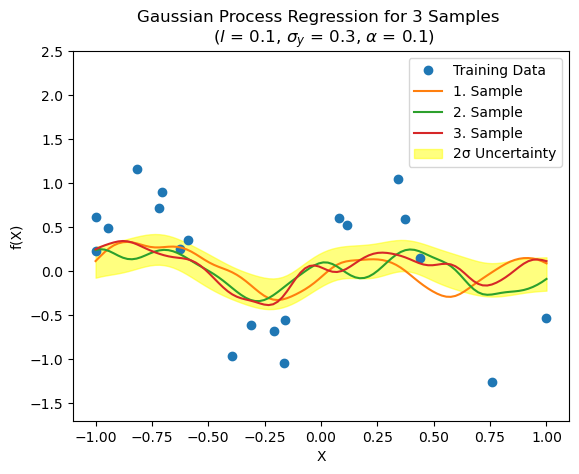

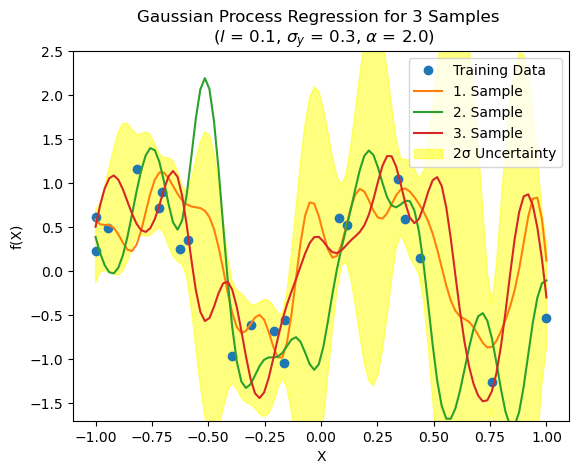

In [10]:
#We do the plotting for constant l and sigma_y, but for lowest and highest alpha value.
#We also plot the best alpha value.
plotting(X_test, X, F, 0.1, 0.3, alpha_range[0], 3)
plotting(X_test, X, F, 0.1, 0.3, alpha_range[9], 3)

* **We see that:**
    * **For Too Small $\alpha$:**
        * The Model **Underfits** the Data!
        * **The Prediction "Performance" of the Gaussian Process is low (not confident)!**
    * **For Too Large $\alpha$:**
        * The Model **Overfits** the Data!
        * **The Prediction "Performance" of the Gaussian Process is too high (too confident)!**
        * **This means that a new added Data might not be represented well with the Model we have!**

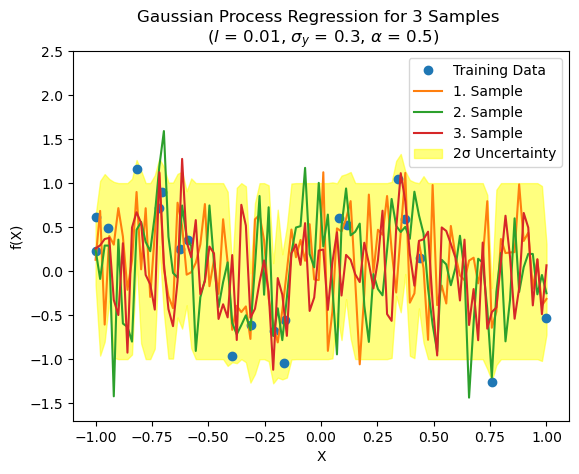

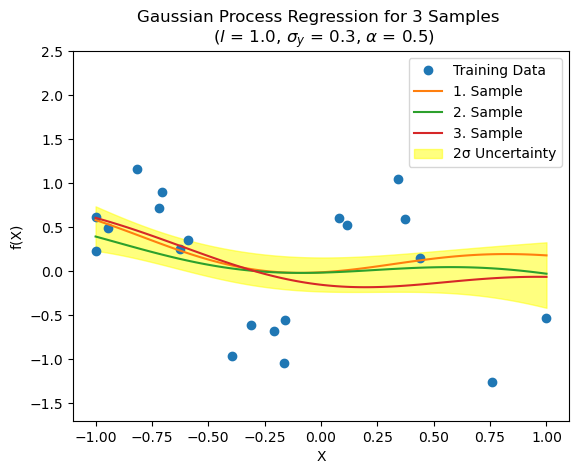

In [11]:
#Now we do the plotting for constant sigma_y and alpha, but for lowest and highest l value.
plotting(X_test, X, F, l_range[0], 0.3, 0.5, 3)
plotting(X_test, X, F, l_range[9], 0.3, 0.5, 3)

* **We see that:**
    * **For Too Small $l$:**
        * **There is a noise in our model!**
        * **Model is too sensitive to the Small-Scale variations in the data!**
    * **For Too Large $l$:**
        * **The Model is too smooth!** *(Oversmoothing)*
        * **Model is not sensitive to variations at all!**

**Usage** of AI: *Used to understand the code structure and calculation steps in all of the parts of this question.*

## Chapter 6: Logistic regression - classification (13 points)


### 6.1 Likelihoods (2 points)

2. **(2 pt)** Starting with the likelihood of the binary logistic regression
$$
p(\mathbf{t} | \mathbf{w})=\prod_{n=1}^{N} y_{n}^{t_{n}}\left\{1-y_{n}\right\}^{1-t_{n}} \, ,
$$
show that the negative logarithm of the likelihood gives the *binary cross-entropy* error and that the derivative of the cross entropy error is
$$
\nabla E(\mathbf{w})=\sum_{n=1}^{N}\left(y_{n}-t_{n}\right) \phi_{n} \, .
$$


### Answer:

* First of all, let's write down the Likelihood of the Binary Logistic Regression and explain it.
* Before this we have some **considerations!**

* We consider the following:
    * 1-) **We consider the Dataset:** $(\phi_n, t_n)$
    * 2-) **$t_n$ can get the values:** $t_n \in \{0,1 \}$
    * 3-) **$\phi_n$ is the following:** $\phi_n = \phi(x_n)$
    * 4-) **$n$ represents the data we are at:** $n = 1, ..., N$

* Now we can write down the Likelihood as follows: *(Product of Bernoulli Distributions!)*

$$
p(\mathbf{t} | \mathbf{w})=\prod_{n=1}^{N} y_{n}^{t_{n}}\left\{1-y_{n}\right\}^{1-t_{n}} \, ,
$$

* In here:
    * $\mathbf{t} = (t_1, t_2, ..., t_N)^T$: **Vector of Target Labels**
    * $\mathbf{w}$: **Model/Optimal Parameters**
    * $y_n = p(t_n = 1|\mathbf{x}_n, \mathbf{w})$: **Probability that Model Assigns to the Target Label being 1 for the $n$-th Data Point!** *(Output of the Logistic Regression model)*

* $y_n$ can also be given by the following formula:

$$ y_n = \sigma(\mathbf{w}^T \phi_n) $$
<h5><center> $\sigma$: Logistic Sigmoid Function </h5>

* We can rearrange this expression as follows. (**Important for derivation!**)

$$ \sigma = \frac{y_n}{(\mathbf{w}^T \phi_n)} $$

* The derivative of this will be the following: (**Important for derivation!**)

$$ \frac{d\sigma}{da} = \frac{dy_n}{d(\mathbf{w}^T \phi_n)} $$

* We should note that the **Derivative of the Sigmoid Function** is given by the following expression.

$$ \frac{d\sigma}{da} = \sigma(1-\sigma) $$

* In here $a$ is defined as follows:

$$ a = \ln\frac{p(x|C_1)p(C_1)}{p(x|C_2)p(C_2)} = \ln\frac{p(x,C_1)}{p(x,C_2)}$$

* From here, the derivative we have defined previously becomes the following: (**Important for derivation!**)

$$ \frac{dy_n}{d(\mathbf{w}^T \phi_n)} = y_n(1-y_n) $$

* Now we can get into our derivations.

* We take the **Negative Log-Likelihood of the formula above** to get **Cross-Entropy Error Function**!
* For this, we **first take the logarithm of the Likelihood of Logistic Regression.**

$$p(\mathbf{t} | \mathbf{w})=\prod_{n=1}^{N} y_{n}^{t_{n}}\left\{1-y_{n}\right\}^{1-t_{n}}$$
<h5><center> We take the logarithm of both sides. </center></h5>

$$\log{p(\mathbf{t} | \mathbf{w})}=\log{\prod_{n=1}^{N} y_{n}^{t_{n}}\left\{1-y_{n}\right\}^{1-t_{n}}}$$
<h5><center> We use the $\log(a_1 \times a_2 \times \cdots \times a_n) = \log(a_1) + \log(a_2) + \cdots +\log(a_n)$ Product Rule of Logarithms to turn the Product into a Sum! </center></h5>

$$\log{p(\mathbf{t} | \mathbf{w})}=\sum_{n=1}^{N} \log{\left(y_{n}^{t_{n}}\left\{1-y_{n}\right\}^{1-t_{n}}\right)}$$
<h5><center>We use the $\log{y_n^{t_n}} = t_n\log{y_n}$ Rule to get the following expression. </center></h5>

$$\log{p(\mathbf{t} | \mathbf{w})}=\sum_{n=1}^{N} \left[t_n\log(y_n) + (1-t_n)\log(1-y_n)\right]$$
<h5><center> We take the minus of both sides to obtain the Cross-Entropy Error Function!</center></h5>

$$ -\log{p(\mathbf{t}|\mathbf{w})} = -\sum_{n = 1}^{N}\left[t_n\log{y_n} + (1-t_n)\log(1-y_n)\right] $$
<h5><center> Cross-Entropy Error Function</center></h5>

* **We have obtained the Cross-Entropy Error Function by taking the Negative Logarithm of the Likelihood!**
* Now our goal is to **take the Gradient of this expression (with respect to the Model Parameters $\mathbf{w}$) to obtain the *Gradient Descent* formula!**

$$ -\log{p(\mathbf{t}|\mathbf{w})} = -\sum_{n = 1}^{N}\left[t_n\log{y_n} + (1-t_n)\log(1-y_n)\right] $$
<h5><center> We take the Gradient of the left side with respect to the Model Parameters $\mathbf{w}$.</center></h5>

$$ \nabla E(\mathbf{w}) = \frac{\partial{}}{\partial{\mathbf{w}}}\left(-\log{p(\mathbf{t}|\mathbf{w})}\right) $$
<h5><center> We use the Chain Rule of Derivatives to get $y_n$ included.</center></h5>

$$ \nabla E(\mathbf{w}) = \frac{\partial{}}{\partial{\mathbf{w}}}\left(-\log{p(\mathbf{t}|\mathbf{w})}\right) $$
<h5><center> We use the Chain Rule of Derivatives to get $y_n$ included (Note that due to $y_n$ getting involved, we also get the Sum Symbol).</center></h5>

$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}\left[\frac{\partial{}}{\partial{y_n}}\left(-\log{p(\mathbf{t}|\mathbf{w})}\right)\frac{\partial{y_n}}{\partial{\mathbf{w}}}\right] $$
<h5><center> Now we calculate the Derivatives inside the sum individually.</center></h5>

$$ \frac{\partial{}}{\partial{y_n}}\left(-\log{p(\mathbf{t}|\mathbf{w})}\right) = \frac{\partial{}}{\partial{y_n}}\left[-\sum_{n = 1}^{N}\left[t_n\log{y_n} + (1-t_n)\log(1-y_n)\right]\right] $$
$$\frac{\partial{}}{\partial{y_n}}\left(-\log{p(\mathbf{t}|\mathbf{w})}\right) = -\left[\frac{t_n}{y_n} - \frac{1-t_n}{1-y_n}\right]$$
<h5><center> Derivative of the First Term.</center></h5>

$$ \frac{\partial{y_n}}{\partial{\mathbf{w}}} = \frac{\partial{y_n}}{\partial{(\mathbf{w}^T \phi_n)}} \times \frac{\partial{(\mathbf{w}^T \phi_n)}}{\partial{\mathbf{w}}}$$
<h6><center> First term on the right side is the derivative of Sigmoid Function! (Discussed in introduction to the derivation)</h6>

$$ \frac{\partial{y_n}}{\partial{\mathbf{w}}} = y_n(1-y_n) \times \frac{\partial{(\mathbf{w}^T \phi_n)}}{\partial{\mathbf{w}}}$$
<h6><center> Second term on the right side is the Derivative of $\mathbf{w}^T \phi_n$ with respect to $w_i$ which is the Input Vector $\phi_n$!</h6>

$$ \frac{\partial{y_n}}{\partial{\mathbf{w}}} = y_n(1-y_n)\phi_n$$
<h5><center> Derivative of the Second Term.</center></h5>

* Now we put two Derivatives together to get the **Gradient Descent** formula!

$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}\left[\frac{\partial{}}{\partial{y_n}}\left(-\log{p(\mathbf{t}|\mathbf{w})}\right)\frac{\partial{y_n}}{\partial{\mathbf{w}}}\right] $$
<h5><center> We insert the Derivatives we have calculated.</center></h5>

$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}\left[-\left[\frac{t_n}{y_n} - \frac{1-t_n}{1-y_n}\right] \times y_n(1-y_n)\phi_n \right] $$
$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}\left[-\left[\frac{(t_n)y_n(1-y_n)\phi_n}{y_n} - \frac{(1-t_n)y_n(1-y_n)\phi_n}{1-y_n}\right] \right] $$
$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}-\left[t_n(1-y_n)\phi_n - (1-t_n)y_n\phi_n\right] $$
$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}-\left[(t_n-t_ny_n)\phi_n - (y_n-y_nt_n)\phi_n\right] $$
$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}-\phi_n\left[(t_n-t_ny_n) - (y_n-y_nt_n)\right] $$
$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}\phi_n\left[-(t_n-t_ny_n) + (y_n-y_nt_n)\right] $$
$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}\phi_n\left[-t_n+t_ny_n + y_n-y_nt_n\right] $$

$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}\left(y_n - t_n\right)\phi_n $$
<h5><center> Gradient Descent Formula</center></h5>

**Usage** of AI: *Used for steps and calculations as a guide alongside the lecture slides.*

### 6.2 Logistic Regression With Numpy (9 points)

*Murphy 8.2, 8.3.2; Bishop 3.1.3, 4.3.2*

In this exercise, we will implement logistic regression to predict the gender of a person based on their height and weight. We will first do this with regular python and numpy and then introduce [PyTorch](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html), the machine learning package that will be used for the remainder of the class.

First, let's import some data.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [13]:
# Import training data
# This will donwload the training data to the virtual colab data folder
# Colab deletes the stored files every time you close your browser, so make sure to run this cell every time
!wget https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv

--2024-04-23 19:45:58--  https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418121 (408K) [text/plain]
Saving to: '01_heights_weights_genders.csv.2'

     0K .......... .......... .......... .......... .......... 12% 1,39M 0s
    50K .......... .......... .......... .......... .......... 24% 1,56M 0s
   100K .......... .......... .......... .......... .......... 36% 1,77M 0s
   150K .......... .......... .......... .......... .......... 48% 2,95M 0s
   200K .......... .......... .......... .......... .......... 61% 2,87M 0s
   250K .......... .......... .......... .......... .......... 73% 3,03M 0s
   300K .......... .......... .......... ..

In [14]:
# Read training data
# Now you have access to the label T (0 for Male, 1 for Female), height, and weight for 10,000 data points
data = pd.read_csv("01_heights_weights_genders.csv")
T = np.array([0. if x=='Male' else 1. for x in data['Gender'].values])
H = data['Height'].values
W = data['Weight'].values

print(H.mean())
print(W.mean())

66.36755975482124
161.44035683283076


1. **(1 pt)** Before we continue, we need to **scale** our data to be in similar ranges. Machine learning algorithms will not work well if the ranges of each dimension are very different. Taking a look at our data, the mean value for height is 66.36 (inches), while the mean for weight is 161 (lbs). These are incompatible and will lead to poor performance. Therefore, before we continue define new variables `H_scaled` and `W_scaled` such that they are [standardized](https://en.wikipedia.org/wiki/Feature_scaling). Also feel free to spend a few minutes reading about other feature scaling options.

### Answer:

* **Scaling** can be done using the following formula: *(Standardization - Z Score Normalization)*

$$ x^\prime = \frac{x-\overline{x}}{\sigma} $$

* In here:
    * $x^\prime$: **The Scaled Value of the Data**
    * $x$: **The given Data with dimensions**
    * $\overline{x}$: **The Mean of the Data**
    * $\sigma$: **The Standard Deviation of the Data**

* This Method/Formula:
    * 1-) **Used in Machine Learning to make the features of the data have zero-mean and unit variance!**
    * 2-) **Used for Normalization in Machine Learning Algorithms such as Support Vector Machines, Logistic Regression and Artificial Neural Networks.**
    * **Calculated by:**
        * 1-) Find The distribution of Mean and Standard Deviation for each feature.
        * 2-) Substract the mean from each feature!
        * 3-) Divide the values of each feature by its Standard Deviation!

* Now we scale our data by using this formula.

In [15]:
#We get the Mean and Standard Deviation of both Heights and Weights.
H_mean, H_std = H.mean(), H.std()
W_mean, W_std = W.mean(), W.std()

#We use the Normalization formula to Scale Height and Weight Data.
H_scaled = (H - H_mean) / H_std
W_scaled = (W - W_mean) / W_std

print(90 * "*")
print("Height Data:")
print(90 * "-")
print("Original Data:", H)
print("Scaled Data:", H_scaled)
print(90 * "*")

print(90 * "*")
print("Weight Data:")
print(90 * "-")
print("Original Data:", W)
print("Scaled Data:", W_scaled)
print(90 * "*")

******************************************************************************************
Height Data:
------------------------------------------------------------------------------------------
Original Data: [73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]
Scaled Data: [ 1.94406149  0.62753668  2.01244346 ... -0.64968792  0.69312469
 -1.14970831]
******************************************************************************************
******************************************************************************************
Weight Data:
------------------------------------------------------------------------------------------
Original Data: [241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]
Scaled Data: [ 2.50579697  0.02710064  1.59780623 ... -1.02672965  0.07512745
 -1.48850724]
******************************************************************************************


2. **(0.5 pt)** Make a scatter plot of your data, showing the label of the data in color.


### Answer:

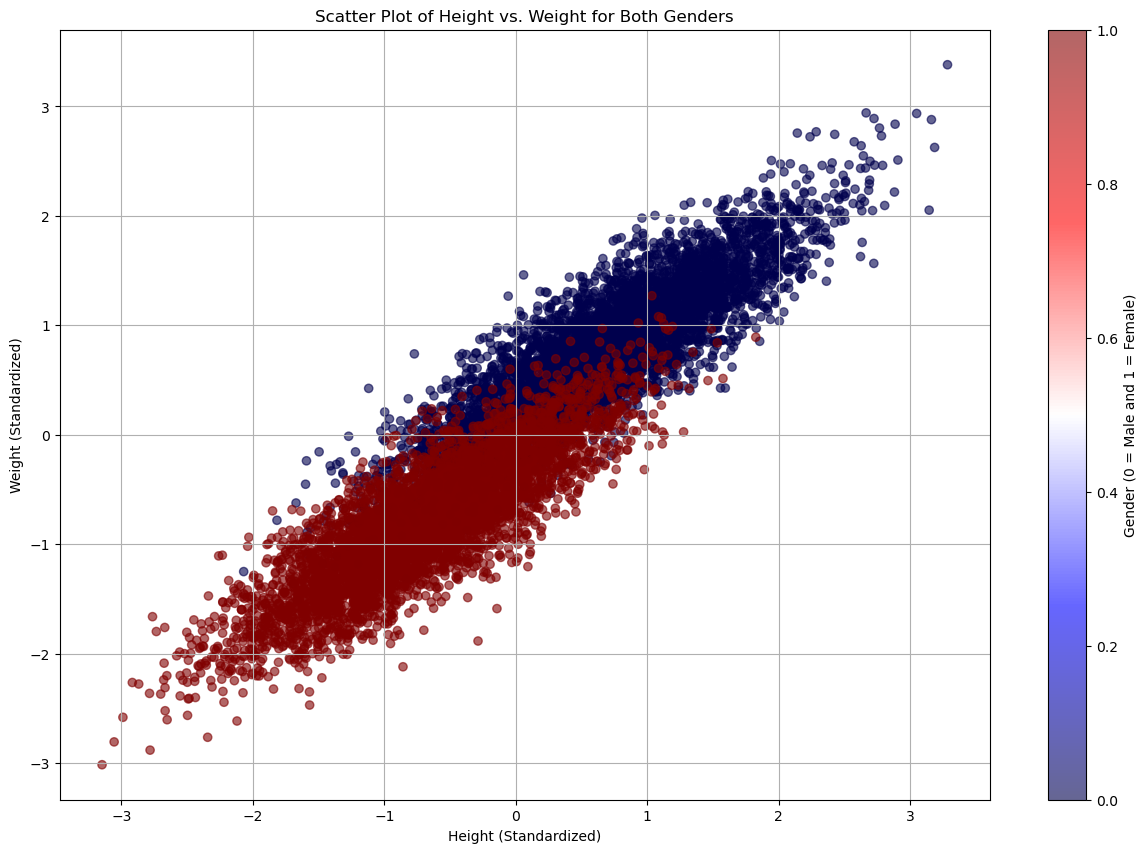

In [16]:
#We create a figure then our scatter plot as follows.
plt.figure(figsize = (15, 10))

#In the plt.scatter() function, c is used to color the Genders differently!
#For that, we use the T variable we have defined, which contains 0 and 1 values representing Male and Female
#respectively.
plt.scatter(H_scaled, W_scaled, c = T, cmap = "seismic", alpha = 0.6)

#We add labels and title.
plt.xlabel("Height (Standardized)")
plt.ylabel("Weight (Standardized)")
plt.title("Scatter Plot of Height vs. Weight for Both Genders")

#We also add a colorbar to show which colors mean which Genders.
plt.colorbar(label = "Gender (0 = Male and 1 = Female)")

#plt.style.use(["dark_background"])
plt.style.use(("default"))
plt.grid(True)
plt.show()

3. **(1 pt)** Currently, our target vector has shape (N,). However, a subtle point of numpy arrays: they can't be one-dimensional if you want to take dot products, so we need to reshape our target array into an (N,1) shape. Additionally, we need to turn our input values array from the two (N,) arrays into a singular array of shape (N,2), where 2 is the number of features we have. Perform this operation below.

### Answer:

* Our **Target Vector is basically the Gender Data we have**. *(We want to predict the Gender with given Height and Weight Data!)*
* Our **Input Value/Vector is the Weight and Height Data**.
* Considering these, we reshape our arrays.

In [17]:
#We reshape our Target Vector i.e. the Gender Data to Nx1 Shape as follows.
#In here to understand what "-1" does check 5.2.1 Code!
T = T.reshape(-1, 1)

#To get our Input Vector or Nx2 we will just column stack our SCALED Weight and Height values.
D = np.column_stack((H_scaled, W_scaled))

print(90 * "*")
print("Target Vector (Genders):")
print(T)
print(90 * "*")

print(90 * "*")
print("Input Vector (Scaled Height & Scaled Weight):")
print(D)
print(90 * "*")

******************************************************************************************
Target Vector (Genders):
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
******************************************************************************************
******************************************************************************************
Input Vector (Scaled Height & Scaled Weight):
[[ 1.94406149  2.50579697]
 [ 0.62753668  0.02710064]
 [ 2.01244346  1.59780623]
 ...
 [-0.64968792 -1.02672965]
 [ 0.69312469  0.07512745]
 [-1.14970831 -1.48850724]]
******************************************************************************************


4. **(2 pt)** Now we will move onto implementing all that is needed to find an optimal solution for logistic regression using gradient descent.  Remember that our model is defined by
$$
a_n = \boldsymbol{w}^T\boldsymbol{\phi}_n \, ,
$$
$$
y_n = \sigma (a_n) \, .
$$
To start, we will need access to our loss function and our sigmoid. In addition, we will need access to our basis functions $\boldsymbol{\phi}_n$. In this case, $\boldsymbol{\phi}_n = [1, \boldsymbol{x}_n]$ so that we extend our model to include a bias. Implement these below.

### Answer:

* Before writing the code, let's write down all the formulas we need for this part.
### Note: In the next parts, the Initial and Model Parameters are the same as the Initial and Model Weights (Not the "Height-Weight" Weight, these are the parameters of the model that are learned during training!)

* Note that for the `phi(x)` function the following comments were provided:
    * `Binary Cross Entropy between vector of targets t and vector of predictions y`
    * `be mindful to add a small value epsilon to any place that might pose numerical instabilities`
    * `i.e. log(0) would be problematic...`

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
<h5><center> Logistic Sigmoid Function </h5>
<h6><center> (Lecture 6 - Slide 13) </h6>

$$ loss(t, y) = -\frac{1}{N}\sum_{n = 1}^{N}\left[t_n\log{(y_n+\epsilon)} + (1-t_n)\log(1-y_n + \epsilon)\right] $$
<h5><center> Cross Entropy Loss Function </h5>
<h6><center> $t$: Target Vector (Gender Data) </h6>
<h6><center> $y$: Predicted Vector (Predicted Gender given Height and Weight) </h6>
<h6><center> $\epsilon$: Added to avoid values such as $\log(0)$ </h6>
<h6><center> (Lecture 6 - Slide 19) </h6>
<h6><center> (Same as Cross-Entropy Error Function but with a Normalization Factor for the Loss Value to be comparable accross Datasets of different sizes!) </h6>
<h6><center> (TLDR: Has a Normalization Factor to Scale the Loss Value!) </h6>

$$ \boldsymbol{\phi}_n = [1, \boldsymbol{x}_n] $$
<h5><center> Basis Function </h5>
<h6><center> (Given in the Question) </h6>

* Now we put these formulas into our functions.

In [18]:
def sigmoid(x):
    """Takes the Input Vector/Array and returns the Sigmoid Function value.
    
    Input:
    ----------------------------------------------------------------------------
    x: Input Values as a Numpy Array.
    
    Output:
    ----------------------------------------------------------------------------
    sigmoid: Calculated Sigmoid Function Value for given x array.
    
    """

    #We calculate the Sigmoid Function using the formula.
    sigmoid = 1 / (1 + np.exp(-x))
    
    return sigmoid

def loss(t, y):
    """Takes the Target Vector and Predicted Vector, calculates and returns the 
    Cross-Entropy Loss Function for given vectors.
    
    Input:
    ----------------------------------------------------------------------------
    t: Target Vector as a Numpy Array.
    y: Predicted Vector as a Numpy Array.
    
    Output:
    ----------------------------------------------------------------------------
    CELF: Calculated Cross-Entropy Loss Function "CELF" for given Target Vector 
    (t) and Predicted Vector (y).
    
    """

    #We will add an additional value to logarithms to avoid Numerical Instabilities.
    epsilon = 1e-15

    #We calculate the Cross Entropy Loss Function.
    CELF = - np.mean(t * np.log(y + epsilon) + (1 - t) * np.log(1 - y + epsilon))
    
    return CELF

def phi(x):
    """Takes the given Input Array, returns a Matrix with those Inputs on its 
    second column with first column consisting of ones.
    
    Input:
    ----------------------------------------------------------------------------
    x: Input Values as a Numpy Array.
    
    Output:
    ----------------------------------------------------------------------------
    phi: Basis Function that consists of 1 values on the first column of the 
    matrix and Input Values on the second column of the matrix.
    
    """
    
    #We define Phi as an array with "1" values on the first column and x values on
    #the second column.
    phi = np.column_stack((np.ones(len(x)), x))
    
    return phi

5. **(2 pt)** Next, we implement our gradient descent. Define a function called `gradient_descent` that takes as input the dataset transformed and in the form of basis $\boldsymbol{\phi}$, the target values, the initial values of the parameters $\boldsymbol{w}$, the number of iterations to perform, and the learning rate. It should return the loss history (the value of the loss at each iteration step) as well as the final value of $\boldsymbol{w}$.

### Answer:

* For the Gradient Descent we can use the formula we have derived previously.

$$ \nabla E(\mathbf{w}) = \sum_{n=1}^{N}\left(y_n - t_n\right)\phi_n $$

* But we once again need it to be scaled right.
* For that reason, we add an additional $1/N$ term infront of the equation.

$$ \nabla E(\mathbf{w}) = \frac{1}{N}\sum_{n=1}^{N}\left(y_n - t_n\right)\phi_n $$

* We should also remember the following formulas for calculation.

$$a_n = \boldsymbol{w}^T\boldsymbol{\phi}_n$$
$$y_n = \sigma (a_n)$$
<h6><center> $\boldsymbol{\phi_n}$: Input Vector Containing Height and Weight </h6>
<h6><center> $\boldsymbol{w}$: Model Parameters/Weights </h6>
<h6><center> $y_n$: Predicted Vector Containing Predicted Height and Weight </h6>

* Now we can define our function.

In [19]:
def gradient_descent(D, T, w_initial, iteration_no, learning_rate):
    """Takes the Input Vector, Target Vector, Initial Parameter Values, number
    of iterations that will be done and the learning rate (step size) for the 
    Gradient Descent. Returns the Loss Function History for each iteration and
    the Final Parameter Values.
    
    Input:
    ----------------------------------------------------------------------------
    D: Input Vector (Contains Height and Weight) (NxN Dimensions)
    T: Target Vector (Contains Genders) (Nx1 Dimensions)
    w_initial: Initial Parameter/Weight Values. (D+1x1 Dimensions)
    iteration_no: Number of iterations that will be done during Gradient Descent.
    learning_rate: Size of the steps during Gradient Descent.
    
    Output:
    ----------------------------------------------------------------------------
    loss_history: List containing the value of Loss Function per Iteration Step.
    w: Final Parameter Values after Gradient Descent.
    
    """

    #Since we need the loss history, we create a list to store them per iteration.
    loss_history = []

    #We start our iteration with the initial weight values!
    w = w_initial

    #Now do Gradient Descent for given number of iterations.
    for i in range(iteration_no):
        #We need to first compute the predictions i.e. y values!
        #For this we use the formulas we have given.
        #We first calculate the value of a.
        a = np.dot(D, w)

        #Then we calculate the Predicted Vector, which can be calculated by our previously defined sigmoid
        #function!
        y = sigmoid(a)

        #Now we calculate the Gradient Descent by using the formula.
        #Note that we take the Transpose of Input Vector to do the Dot Product correctly.
        grad_descent = np.dot(D.T, (y - T)) / len(T)

        #We now update the Parameter Values/Weights (w) as follows.
        w -= learning_rate * grad_descent

        #We then compute the loss value on this iteration.
        current_loss = loss(T, y)

        #We then add this to our Loss History list.
        loss_history.append(current_loss)

    return loss_history, w

6. **(1 pt)**  Now we have all the building blocks and are ready to train! Below we do a little bit of preprocessing and initialization. Fill in under the instructions below and train your model for 1500 iterations. Experiment a little bit with the value for the learning rate, though a value of  0.0001 is a good starting point.

### Answer:

#### 1-)
* *Transform X into phi using the function you wrote above.*
* *Question: What are the Dimensions of Phi x?*

In [20]:
#We use our phi function to Transform our Input Vector into Phi!
phi_x = phi(D)

print(90 * "*")
print("Input Vector i.e. x:")
print(D)
print(90 * "-")
print("Transformed Vector i.e. Phi(x):")
print(phi_x)
print(90 * "*")
print("Dimensions of x:")
print(np.shape(D))
print(90 * "-")
print("Dimensions of Phi(x):")
print(np.shape(phi_x))
print(90 * "-")
print("The Dimension is: (Number of Data Points x Number of Features + 1)")
print("In Other Words: (Row of D x Column of D + 1)")
print(90 * "*")

******************************************************************************************
Input Vector i.e. x:
[[ 1.94406149  2.50579697]
 [ 0.62753668  0.02710064]
 [ 2.01244346  1.59780623]
 ...
 [-0.64968792 -1.02672965]
 [ 0.69312469  0.07512745]
 [-1.14970831 -1.48850724]]
------------------------------------------------------------------------------------------
Transformed Vector i.e. Phi(x):
[[ 1.          1.94406149  2.50579697]
 [ 1.          0.62753668  0.02710064]
 [ 1.          2.01244346  1.59780623]
 ...
 [ 1.         -0.64968792 -1.02672965]
 [ 1.          0.69312469  0.07512745]
 [ 1.         -1.14970831 -1.48850724]]
******************************************************************************************
Dimensions of x:
(10000, 2)
------------------------------------------------------------------------------------------
Dimensions of Phi(x):
(10000, 3)
------------------------------------------------------------------------------------------
The Dimension is: (Numb

#### 2-)
* *In order to start Gradient Descent, we initialize our Parameters `w_initial`, typically with small values.*
* *Question: Why would initializing with all zeroes be potentially problematic?*

* **Initializing with all zeroes could cause the algorithm/model to get stuck on a Local Minimum!**
* **This is because if the Parameters start with the same value and move in the same direction during the optimization, they could get stuck on a Local Minimum.**
* **If the Parameter Values were all ones, all twos etc. we would potentially face the same problem!**
* **So this is not exclusive to all zeroes, but for all cases where parameters start with the same value.**
* In case of getting stuck on a Local Minimum: **The Model/Algorithm won't explore the Parameter Space!**

#### 3-)
* *Call your gradient_descent function here using the initializations below.*
* *Train your model for 1500 iterations. Experiment a little bit with the value for the learning rate, though a value of  0.0001 is a good starting point.*

In [21]:
#For experimenting, we'll define a list of learning rates as follows.
learning_rate_list = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

#We also have to define the initial parameters/weights which we will randomly sample from Normal Distribution.
#Note that w has to be in shape of (D+1, 1)
#We also use np.random.seed() to get "reproducibility".
np.random.seed(0)
w_initial = np.random.randn(phi_x.shape[1], 1)

print(90 * "*")
print(f"Initial Parameter Values: {w_initial}")
print(90 * "*")

#We also set the iteration number to be 1500.
iteration_no = 1500

#We now go over these Learning Rate values and print our results.
for learning_rate in learning_rate_list:
    #We get the loss history and final Parameter Values.
    loss_history, w_final = gradient_descent(phi_x, T.reshape(-1, 1), w_initial, iteration_no, learning_rate)

    print(90 * "~")
    print(f"Learning Rate: {learning_rate}")
    print(90 * "-")
    print(f"Loss History: [{loss_history[0]}, ..., {loss_history[-1]}]")
    print(f"Final Parameter Values: \n {w_final}")
    print(90 * "~")

******************************************************************************************
Initial Parameter Values: [[1.76405235]
 [0.40015721]
 [0.97873798]]
******************************************************************************************
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Learning Rate: 100
------------------------------------------------------------------------------------------
Loss History: [1.6871618758721416, ..., 0.4883409583969358]
Final Parameter Values: 
 [[ -9.85001817]
 [  2.22538967]
 [-13.7751144 ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Learning Rate: 10
------------------------------------------------------------------------------------------
Loss History: [1.5355064004843881, ..., 0.20912979712010632]
Final Parameter Values: 
 [[-0.01870311]
 [ 1.8952746 ]
 [-6.

7. **(0.5 pt)** Plot your loss as a function of iteration. Have the values of the weights converged yet? How can you tell?

### Answer:

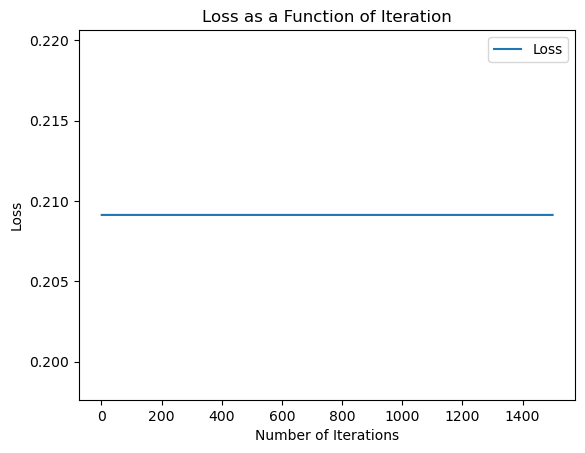

In [22]:
#We plot the Loss as a function of Iteration as follows.
#Note that we are using Learning Rate = 0.0001 for the plotting since that's the last Learning Rate we used
#in the previous loop.
plt.plot(range(1,  iteration_no + 1), loss_history, label = "Loss")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss as a Function of Iteration")
plt.legend()
plt.show()

* *Have the values of the weights converged yet? How can you tell?*

* For this we will use the previous loop, but this time we will also plot the Loss as a Function of Iteration.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Learning Rate: 100
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


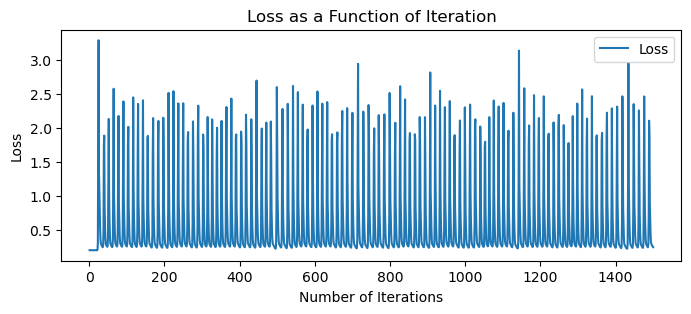

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Learning Rate: 10
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


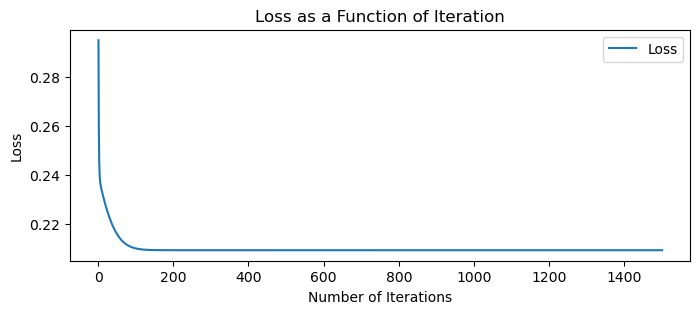

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Learning Rate: 1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


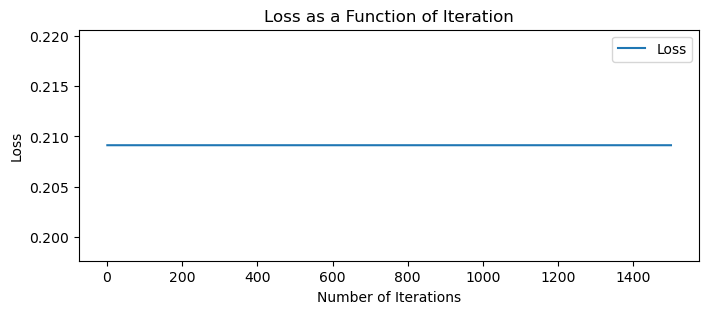

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Learning Rate: 0.0001
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


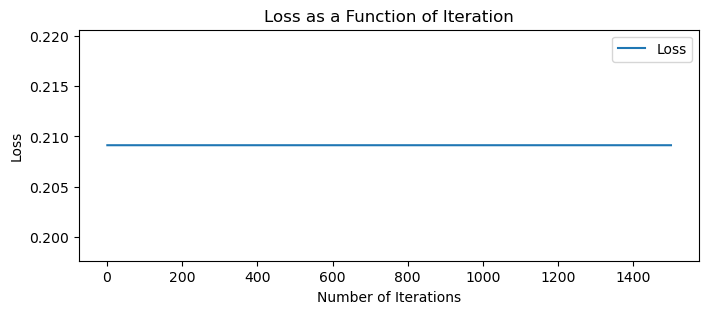

In [23]:
learning_rate_list = [100, 10, 1, 0.0001]

for learning_rate in learning_rate_list:
    #We get the loss history and final Parameter Values.
    loss_history, w_final = gradient_descent(phi_x, T.reshape(-1, 1), w_initial, iteration_no, learning_rate)

    print(100 * "~")
    print(f"Learning Rate: {learning_rate}")
    print(100 * "~")

    plt.figure(figsize = (8, 3))
    plt.plot(range(1,  iteration_no + 1), loss_history, label = "Loss")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss")
    plt.title("Loss as a Function of Iteration")
    plt.legend()
    plt.show()

* From these plots we can see that:
    * **When Learning Rate is High:**
        * The **Initial Parameter Values** and **Model Parameter Values** **DO NOT CONVERGE in 1500 Iterations!**
        * We either **have to increase the number of iterations** or **decease the Learning Rate/Step Size** to make the Model Parameters converge with Initial Parameter Values.
        * **That's why the Loss as a Function of Iteration shows fluctuations!**
     * **When Learning Rate is Low:**
        * The **Initial Parameter Values** and **Model Parameter Values** **CONVERGE in 1500 Iterations!**
        * **That's why the Loss as a Function of Iteration shows no fluctuation!**
        * **Note that in Learning Rate = 1 Plot we see the Parameters actually Converging since the Decrease in the Plot shows convergence!**

* Let's summarize what we have said.
* **Loss as a Function of Iteration:**
    * 1-) **Fluctuations or Increase:**
        * ***Means that the Model and Initial Parameters do not Converge!***
        * ***We need to Decrease the Learning Rate/Step Size or Increase the number of Iterations!***
    * 2-) **Decrease:**
        * ***Means that the Model and Initial Parameters are starting to Converge!***
    * 3-) **Flat (No Increase or Decrease):**
        * ***Means that the Model and Initial Parameters have Converged!***

* So **the plot we obtained shows that the Values of the Weights have Converged!**
* Note: **Values of Weights is the same as Initial and Model Parameter values we talked about!**

8. **(1 pt)** Make a scatter plot of your data, but now showing the output of your logistic regression model as the output.

### Answer:

* We again have to use the following formulas, but this time with the **Final Parameter/Weight Values** we have obtained!

$$a_n = \boldsymbol{w}^T\boldsymbol{\phi}_n$$
$$y_n = \sigma (a_n)$$
<h6><center> $\boldsymbol{\phi_n}$: Input Vector Containing Height and Weight </h6>
<h6><center> $\boldsymbol{w}$: Model Parameters/Weights </h6>
<h6><center> $y_n$: Predicted Vector Containing Predicted Height and Weight </h6>

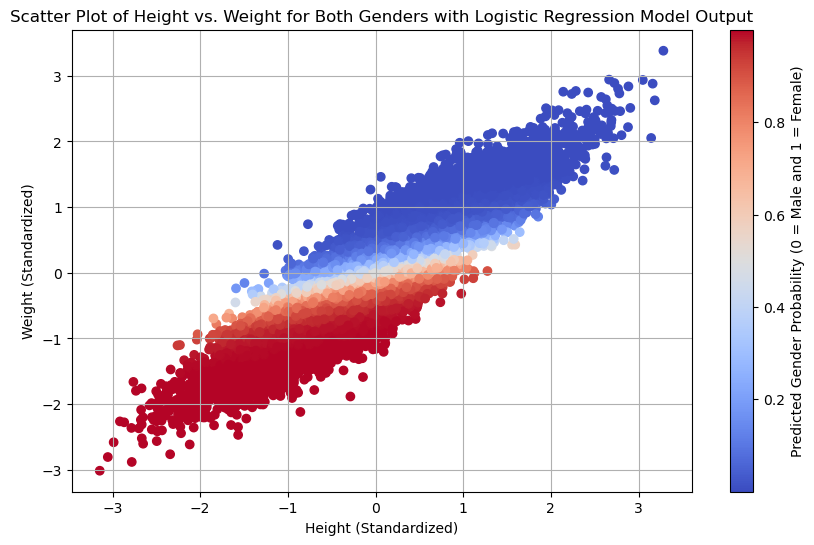

In [24]:
#We now calculate a and this time Predicted Vector (finally) values as follows.
a = np.dot(phi_x, w_final)
y_predicted = sigmoid(a)

#Now we plot our Data along with the Model Output.
plt.figure(figsize = (10, 6))

#Instead of the Gender Values we had on T Array, we now use our Predicted Gender Values i.e. y_predicted!!!
plt.scatter(H_scaled, W_scaled, c = y_predicted.flatten(), cmap = "coolwarm")

plt.colorbar(label = "Predicted Gender Probability (0 = Male and 1 = Female)")
plt.xlabel("Height (Standardized)")
plt.ylabel("Weight (Standardized)")
plt.title("Scatter Plot of Height vs. Weight for Both Genders with Logistic Regression Model Output")

#plt.style.use(["dark_background"])
plt.style.use(("default"))
plt.grid(True)
plt.show()

* So for **low height and weight we expect the Gender to be Female.**
* For **high height and weight we expect the Gender to be Male.**
* **If Height and Weight Values are more or less in the "middle" of our dataset, then it is 50/50 chance. (The Boundary!)**

* Let's Summarize what we have done so far.

* 1-) We loaded the Dataset containing Height and Weight values alongside the Gender Information. (**Introduction to the Question**)
* 2-) We Standardized the Height and Weight Values and also transformed the Gender Labels to Numbers. (**Part 1**)
* 3-) We plotted our Dataset to see what we will work with. (**Part 2**)
* 4-) We defined the Logistic Regression Model which predicts the Probability of a "Binary Outcome" such as Genders based on the input features which are heights and weights. (**Part 4**)
* 5-) We used Cross-Entropy Loss Function to find the difference between the Predicted Probabilities and True Labels. (**Part 5**)
* 6-) We used Gradient Descent train the Logistic Regression Model for a few iterations to optimize the parameters (**Weights**) of the Logistic Regression Model by minimizing the Loss Function! (**Part 6 and 7**)
* 7-) We plotted the Loss Function's Convergence and Model's Decision Boundary to see if our Logistic Regression Model worked! (**Part 7 and 8**)

**Usage** of AI: *Used to understand the **most** of the code structure and calculation steps in all of the parts of this question. Also used for help in some theoretical parts.*

### 6.3 A pytorch crash-course: Logistic Regression With Pytorch - towards artificial neurons (2 points)

**This exercise is highly guided for you to get familiar with PyTorch, carefully read as it will be relevant in the next weeks.**

Numpy is a great framework for general scientific computing, but it cannot utilize GPUs to accelerate numerical computations nor is it ideal for machine learning specific tasks. We will therefore use Pytorch, a widely used deep learning package. In fact, logistic regression can be seen as the minimal example of a neural network: it consist of a single neuron with a sigmoid activation function. You will learn more about neural networks later in the course. \\
The most important basic concept is that a Pytorch tensor is the same as a numpy array. In this worked out example we will implement logistic regression in Pytorch in the setting of the previous exercise. You are ecouraged to run the following example and examine carefully each step as this will be an important reference to the next exercises. The following basic [tutorials](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) might be helpful to better understand Pytorch.

To train any Pytorch ML model, we need four things: a model definition, a criterion (a loss function), an optimizer (gradient descent for now; we will talk about other optimizers later), and a training routine.

First let's define the model, which we write as a class that inherits from `torch.nn.Module`. We will need one [linear](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) layer. Skim the Linear layer reference material. This time we do not need to worry about implementing basis functions, since the `torch.nn.Linear()` does this for us. The `forward` function simply computes the value of the prediction `y` given the model parameters. We will talk about why this is called "forward" later in the course.

In [25]:
#We create a Class.
#There are two main components in this class.
class LogisticRegression(torch.nn.Module):
    #Constructor.
    #Called when an instance of the class is created.
    def __init__(self):
        #We initialize the model.
        super(LogisticRegression, self).__init__()

        #We define a Linear Layer with 2 Input Features and 1 Output Feature: torch.nn.Linear(2,1)
        self.linear = torch.nn.Linear(2, 1)

    #Now we define how Input Data flows through the Model.
    def forward(self, x):
        #Takes x as an input and passes it through the Linear Layer. => self.linear(x)
        #Then activites the sigmoid Activation Function to produce the y output. => torch.sigmoid(self.linear(x))
        #y Represents the predicted Probabilities!
        y = torch.sigmoid(self.linear(x))
        return y

**(1 pt)** Instantiate your logistic regression model class:

### Answer:

In [26]:
#We can Instantiate the Logistic Regression Model Class as follows.
model = LogisticRegression()

#Now with the Instantiation, our Logistic Regression Model is ready for Training and Prediction.

Defining the criterion and optimizer is a little bit easier because there are quite a few standard ones.

**(1 pt)** Find in the documentation and use the built-in torch functions to define a **binary cross-entropy loss** and name it `criterion`, as the following code is based on this naming.

### Answer:

In [27]:
#nn.BCELoss() => Creates a criterion that measures the Binary Cross Entropy between the target and the input 
#probabilities:
criterion = torch.nn.BCELoss()

We implement batch gradient descent through torch.optim.SGD. This will implement gradient descent on the batch the model receives, since we are passing the whole dataset at once there is nothing stochastic in our case.

In [28]:
    #torch.optim.SGD() => Class Provided by PyTorch that implements the Stochastic Gradient Descent Optimization
#Algorithm
    #model.parameters() => Method of the "model" object that returns an iterator over all learnable parameters
#of the model. These parameters are the Weights and Biases of the Linear Layer defined in the "Logistic
#Regression" Class.
    #lr = 0.01 => Learning Rate/Step Size of the each Iteration!
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Everything in torch needs to be a tensor - *including our dataset.*

(Here `X` and `T` are the same data from our previous exercise in numpy)

In [29]:
#We turn the Numpy Arrays into Tensors.
#Note that our numpy array X was our Data Array i.e. D!
#That's why we use D array for X_tensor!
X_tensor = torch.from_numpy(D).to(torch.float)
T_tensor = torch.from_numpy(T).to(torch.float)

print(D)
print(X_tensor)

[[ 1.94406149  2.50579697]
 [ 0.62753668  0.02710064]
 [ 2.01244346  1.59780623]
 ...
 [-0.64968792 -1.02672965]
 [ 0.69312469  0.07512745]
 [-1.14970831 -1.48850724]]
tensor([[ 1.9441,  2.5058],
        [ 0.6275,  0.0271],
        [ 2.0124,  1.5978],
        ...,
        [-0.6497, -1.0267],
        [ 0.6931,  0.0751],
        [-1.1497, -1.4885]])


Now let's define the training routine. A key point about Pytorch is that it has two modes: training and evaluation. 
* **In training mode:**
    * The parameters of the model are allowed to be iteratively changed.
* **In evaluation mode:**
    * The Parameters of the Model are fixed.
* **Whenever you are plotting or calling the model to make predictions:**
    * Make sure to call `model.eval()` beforehand.
* **Before training:**
    * Call `model.train()`.

`model.train()` is the first step in the training routine.
Then, we define a loop that does the following things:

- 1-) **Zero the gradient.**
    - This is important because the gradient of the loss function is what is updating our model weights.
    - We don't want this to be accidentally doing weird things and then the wrong values update our weights!
      
- 2-) **Call the model on our X values to make predictions.**
- 3-) **Evaluate the predictions using the loss.**
- 4-) **Evaluate the gradient of the loss**
    - This is known as the *backward* pass.
    - We will discuss why this is called this when we get to neural networks.
      
- 5-) **Take an optimizer step.**

In [36]:
#To do Training, we call model.train()
#The parameters/weights of the Model can change iteratively!
model.train()

#We do 200000 Iterations by creating the loop.
for epoch in range(200000):
    #We set the Gradient to Zero!
    optimizer.zero_grad()

    #We call the Model to Make Predictions! (forward pass)
    Y_pred = model(X_tensor)

    #We Evaluate the Predictions using Loss! (compute loss)
    loss = criterion(Y_pred, T_tensor)

    #We Evaluate the Gradient of the Loss. (backward pass)
    if epoch% 1000 == 0:
        print(loss.item())
    # backward pass
    loss.backward()

    #We take an Optimizer Step!
    optimizer.step()

0.20913003385066986
0.20913003385066986
0.20913000404834747
0.20913000404834747
0.20913000404834747
0.20913000404834747
0.2091299593448639
0.2091299593448639
0.2091299295425415
0.2091299593448639
0.2091299295425415
0.2091299146413803
0.2091299295425415
0.2091299146413803
0.2091299295425415
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091299146413803
0.2091

Congratulations on training your first Pytorch model! :) Lastly, let's plot probabilistic predictions for each datapoint.

* **Note:** By looking at the Loss values above, we again see Convergence between the Initial and Model Weights/Parameters!
* **Note:** ***The Model has been trained for 3-4 times (I ran the code a few times)***, that's why **all the loss values are the same** hence **Initial and Model Weights/Parameters have Converged!**
    * In the previous runs of the code i.e. **trainings** the Loss Value kept decreasing.
    * At first the order of decrease was very high around $10^{-1}$.
    * Then on the other runs the order of decrease has gone down to $10^{-4} - 10^{-5}$ levels.
    * At the final run which is printed above, **the loss values stopped decreasing, which means that the convergence happened!**

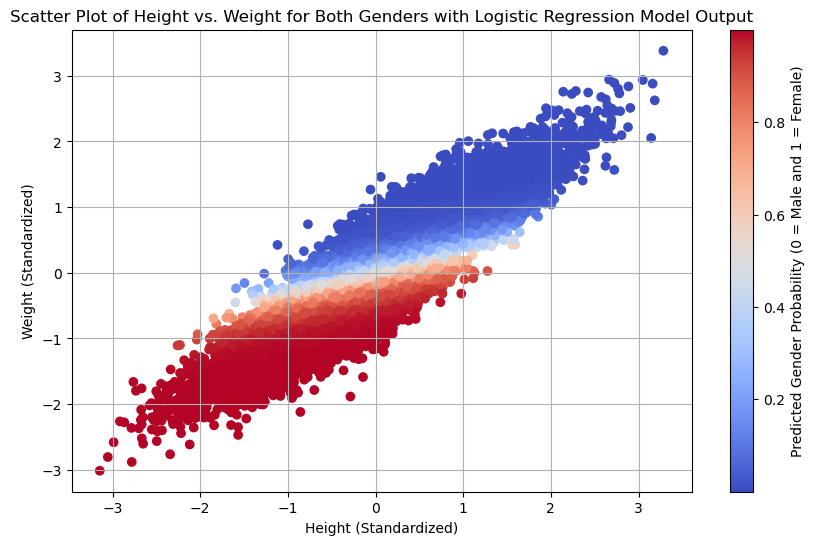

In [37]:
#To do evaluation, we call model.eval()
#The parameters/weights of the Model is now fixed!
model.eval()

    #torch.tensor([h, w], dtype = torch.float) => Creates a PyTorch Tensor containing the input features "h" 
#and "w", converted to floats!
    #model(...) => Calls the model we have defined with the Input Tensor we have created to obtain the Model's
#Output for that Input!
    #.detach().numpy() => Detaches the Output Tensor from the Computational Graph and converts it to Numpy
#Array. (Detach removes the Tensor from the Graph to avoid Gradient Calculations)(Numpy Array conversion is 
#good for matplotlib!)
    #[... for h, w in zip(H_scaled, W_scaled)] => Iteration over each pair of Scaled Height and Weight values 
#(h, w) in H_scaled and W_scaled! (Used for Colormapping)
c = [model(torch.tensor([h, w], dtype=torch.float)).detach().numpy() for h, w in zip(H_scaled, W_scaled)]

#We do a scatter plot.
plt.figure(figsize = (10, 6))
plt.scatter(H_scaled, W_scaled, c = c, cmap = "coolwarm")
plt.xlabel("Height (Standardized)")
plt.ylabel("Weight (Standardized)")
plt.title("Scatter Plot of Height vs. Weight for Both Genders with Logistic Regression Model Output")
plt.grid(True)
plt.colorbar(label = "Predicted Gender Probability (0 = Male and 1 = Female)")
plt.show()

* **Note**: ***In Binary Classifications the Boundary is always going to be $0.5$!!!*** *(It is how we define the model...)*
    * $<0.5$: **Means Class 1!**
    * $>0.5$: **Means Class 2!**

In [132]:
##### Extra #####
#Now we want to use our Model to predict if the Gender is a Male or a Female using the Height and Weight
#Values (Standardized).

def Prediction(height, weight, mean_height = None, std_height = None, mean_weight = None, std_weight = None):
    """Takes the Height and Weight user provides assuming that it is standardized.
    If they are not standardized, expects the Mean and Standard Deviation of the
    Height and Weight Data to standardize the given Height and Weight values
    inside the function. Returns a print statement of the Gender with the
    Predicted Probability by the Trained Model.
    
    Input:
    ----------------------------------------------------------------------------
    height: Standardized or Original Height value. (inches)
    weight: Standardized or Original Weight value. (lbs)
    mean_height: Mean of the Height Values used for Standardization.
    std_height: Standard Deviation of the Height Values used for Standardization.
    mean_weight: Mean of the Weight Values used for Standardization.
    std_weight: Standard Deviation of the Weight Values used for Standardization.
    
    Output:
    ----------------------------------------------------------------------------
    print statement giving the Predicted Gender and Probability by the Trained
    Model.
    
    """

    #We check if the User has provided the mean and standard deviation of height and weight data.
    if mean_height is not None and std_height is not None and mean_weight is not None and std_weight is not None:
        #We standardize the Height and Weight Values:
        standardized_height = (height - mean_height) / std_height
        standardized_weight = (weight - mean_weight) / std_weight

    else:
        #We use the given standardized height and weight values from the user.
        standardized_height = height
        standardized_weight = weight
    
    #We create PyTorch Tensor that will contain our Height and Weight Value.
    input_tensor = torch.tensor([standardized_height, standardized_weight], dtype=torch.float)

    #We then put the Input Tensor into our Model to get the Predicted Probability!
    predicted_probability = model(input_tensor)

    #Now we convert the Probability from Tensor to a Numpy Array.
    predicted_probability = predicted_probability.item()

    #If the predicted probability is over 0.5 we assume its a Female.
    if predicted_probability > 0.5:
        print(f"Female (Predicted Probability: {round(predicted_probability,3)})") 

    #If the predicted probability is under 0.5 we assume its a Male.
    else:
        print(f"Male (Predicted Probability: {round(predicted_probability,3)})")

#We then Predict the Gender depending on the Given Height and Weight.
#Height = [inches] and Weight = [lbs]
print(50 * "-")
print("Predicted Gender:")
print(50 * "-")
print("Female Class: Between 0.5 - 1.0")
print("Male Class: Between 0.0 - 0.5")
print(50 * "-")
Prediction(55, 130, H_mean, H_std, W_mean, W_std)
Prediction(40, 160, H_mean, H_std, W_mean, W_std)
Prediction(40, 80, H_mean, H_std, W_mean, W_std)
Prediction(0.1, 0.2)
print(50 * "-")

--------------------------------------------------
Predicted Gender:
--------------------------------------------------
Female Class: Between 0.5 - 1.0
Male Class: Between 0.0 - 0.5
--------------------------------------------------
Female (Predicted Probability: 0.651)
Male (Predicted Probability: 0.0)
Female (Predicted Probability: 0.959)
Male (Predicted Probability: 0.249)
--------------------------------------------------


**Usage** of AI: *Got help going through the PyTorch Library and the Examples, also for explanations of what some of the code does in the background. Also used it on the Extra part where I gave some Height and Weight to the model to get the gender prediction.*

## Optional exercises

(These exercises do not have to be done. They give no points. However, we provide feedback on your answers)

### A.1 Gaussian Process Regression in the real world

**Reading Material: Murphy 15.1 + 15.2 (up to and including 15.2.3)**

 Let's also now take a look at some real world data. Consider for example, some climate data. Below, I have some data gathered by the [NASA Goddard Institute for Space Studies](https://data.giss.nasa.gov/gistemp/graphs_v4/). This data presents the Land-Ocean Temperature Index, which is the deviation from the mean of the 1951-1980 average temperatures. This measurement is given in degrees Celsius.

   Since measuring global temperature will naturally be a noisy process (things like volcanic eruptions may drag some years down; the measurements in the 1880s were likely not as precise as they are now, etc.), we would assume that the data are not perfect, noiseless measurements.

   Use the data provided below to first, reshape the arrays into the correct shapes, fit the data using your `posteriors` function.

   The $l$ parameter and the $\sigma_y$ parameters are known as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)), which are parameters whose values are used to control the learning process. These parameters cannot be learned through training a machine learning model and instead need to be explored via a grid or random search, in addition to the training of the model itself. This is a big area of the "practical ML" world and those who are good at automatic [hyperparameter tuning](https://www.oreilly.com/library/view/evaluating-machine-learning/9781492048756/ch04.html) can go on to build awesome tools like Google's [AutoML](https://cloud.google.com/automl-tables).


**Your task**

Determine the your preferred choice of hyper parameters `alpha`, `sigma_y` and `l`, and visualize the results, and discuss your choice. There's no "fully correct" choice here, but consider approximately how "noisy" the tempeature deviation is, and consider that the $l$ parameter here effectively controls the timescale of correlations in the data that we are interested in. Plot the results of a few settings of the hyperparameters that you tried, state your final preferred choice, and discuss why you chose it.
(2pt)



In [32]:
years = np.array([1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.,
       1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
       1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
       1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020.])
temperature_index = np.array([-0.16, -0.08, -0.1 , -0.16, -0.28, -0.33, -0.31, -0.36, -0.17,
       -0.1 , -0.35, -0.22, -0.27, -0.31, -0.3 , -0.23, -0.11, -0.11,
       -0.27, -0.17, -0.08, -0.15, -0.27, -0.37, -0.47, -0.26, -0.22,
       -0.38, -0.43, -0.48, -0.43, -0.44, -0.36, -0.34, -0.15, -0.14,
       -0.35, -0.46, -0.3 , -0.28, -0.27, -0.19, -0.28, -0.26, -0.27,
       -0.22, -0.11, -0.22, -0.2 , -0.36, -0.16, -0.1 , -0.16, -0.29,
       -0.13, -0.2 , -0.15, -0.03, -0.01, -0.02,  0.12,  0.18,  0.06,
        0.09,  0.2 ,  0.09, -0.07, -0.03, -0.11, -0.11, -0.18, -0.07,
        0.01,  0.08, -0.13, -0.14, -0.19,  0.05,  0.06,  0.03, -0.03,
        0.06,  0.03,  0.05, -0.2 , -0.11, -0.06, -0.02, -0.08,  0.05,
        0.03, -0.08,  0.01,  0.16, -0.07, -0.01, -0.1 ,  0.18,  0.07,
        0.16,  0.26,  0.32,  0.14,  0.31,  0.16,  0.12,  0.18,  0.32,
        0.39,  0.27,  0.45,  0.41,  0.22,  0.23,  0.32,  0.45,  0.33,
        0.46,  0.61,  0.38,  0.39,  0.54,  0.63,  0.62,  0.54,  0.68,
        0.64,  0.67,  0.55,  0.66,  0.72,  0.61,  0.65,  0.68,  0.75,
        0.9 ,  1.02,  0.93,  0.85,  0.98,  1.02])

Your answer

**Usage** of AI: *COMMENT HERE*

### A.2. Star, Galaxy, or Quasar?



*Ref: Murphy 8.3.7, Bishop 4.3.4*


![alt text](https://www.sdss.org/wp-content/uploads/2014/05/segue.jpg)


In this problem, we will be extending our Pytorch logististic regression model to predict whether an observed object is a star, galaxy, or quasar.

**The Data**

We will be using data collected by the Sloan Digital Sky Survey ([SDSS](http://www.sdss.org/)) and released as part of Data Release 14. SDSS is a multi-spectral and spectroscopic survey telescope at Apache Point Observatory in New Mexico, USA.

The telescope uses a camera of 30 CCDs which observe in different optical filter bands (u,g,r,i,z). The data used here is freely publicly available.

Therefore we will be importing a table of 10,000 objects, for each of which we have the following information:
- class = tells us whether the object is a GALAXY, STAR, or QSO ("quasi-stellar object" or [quasar](https://en.wikipedia.org/wiki/Quasar))
- objid = object identifiier
- specobjid = another object ID, this time for spectroscopic observations
- ra = [Right Ascension](https://en.wikipedia.org/wiki/Right_ascension)
- dec = Declination
- mjd = date of observation


Magnitude in each of the following [filters](http://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp):
- u
- g
- r
- i
- z

A number of attributes of the image that contained the object when imaged by SDSS:
- run = number that identifies a specific scan
- camcol = number that indicates which part of a CCD was used
- field = indicates when in the scan the object was imaged
- rerun = indicates how the image was processed
- fiberid
- plate

The last two items refer to how spectroscopic observations are taken by SDSS. The instruments use ciruclar metal plates that position optical fibers via holes drilled at the locations of objects in an image. The fibers are fed into the spectrographs. Each plate is numbered and so is each fiber. The reason we have these items in our datatable is because spectrographic observations are how SDSS determines

- [redshift](https://en.wikipedia.org/wiki/Redshift),

the last item of information we have for our objects. We will not be needing almost any of the imaging data, so you don't need to understand how SDSS works, but if you're curious, you can read about it [here](http://www.sdss3.org/dr9/imaging/imaging_basics.php).

1. Let's import out data:

In [33]:
# Let's import the aforementioned data
!wget https://raw.githubusercontent.com/klukosiute/ml4pha_datasets/main/Skyserver_SQL2_27_2018%206_51_39%20PM.csv

--2024-04-23 19:49:02--  https://raw.githubusercontent.com/klukosiute/ml4pha_datasets/main/Skyserver_SQL2_27_2018%206_51_39%20PM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-04-23 19:49:02 ERROR 404: Not Found.



In [34]:
sdss_df = pd.read_csv('/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv', skiprows=0)
sdss_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv'

**Usage** of AI: *COMMENT HERE*

2. Exploring data and understanding it is an important part of the machine learning mindset. In that spirit, find out how many objects of each class are in the catalog. How do you think this might influence how often objects are classified as a given class?

In [ ]:
sdss_df['class'].value_counts()

**Usage** of AI: *COMMENT HERE*

We should end up with approx. the same amount of galaxies as stars and then very few quasars.

3. Make histograms of redshift for stars, galaxies, and quasars. What are the results telling you?

In [ ]:
# Your code here

**Usage** of AI: *COMMENT HERE*

Stars are all with the Milky Way, so they get small redshifts (they're close), that can have both positive and negative redshifts since there's nothing making them preferrentially toward or away from us. Galaxies are further and preferrentially move away from us.

Before we can move onto training a model that predicts objects, we need to do a few things to our dataset.

4. We don't need to know everything about astronomy to already understand that there are a number of data columns that won't be related to the target variable **class** in a meaningful way and may lead to only accidental correlations. Therefore we choose to drop these. This can be done with the [df.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function. Which data items do you see as appropriate to remove from the input data?

In [ ]:
# Your code here

**Usage** of AI: *COMMENT HERE*

Next, we need to convert our text labels (STAR, GALAXY, or QSO) into digits. Pytorch has a particular curiosity that, for the `CrossEntropyLoss`, the inputs need to be not one-hot encoded vectors but rather simply the indices of the class. However, the output of the model **should** be a vector of length 3 because the `CrossEntropyLoss` module converts your class indices into one-hot vectors internally.

Therefore, write a function that takes as input the numpy array `sdss_df['class'].values`, which is an array of the strings STAR, GALAXY, or QSO, and converts it to an array that contains 0,1, or 2 as entries.

5. Create your target array `T` using your function.

In [ ]:
# Your code here

**Usage** of AI: *COMMENT HERE*

6. Now build your input array `X` by feature scaling each of your feature columns and combining the features into a numpy array.

In [ ]:
# Your code here

**Usage** of AI: *COMMENT HERE*

Now the final data processing step: we will need a subset of the data to impartially evaluate the performance of our classifier.

7. First, shuffle your X and T arrays, in such a way that each row still corresponds to each row! Split your target array `T` into two arrays: `T_train` and `T_test` and corresponding two `X_train` and `X_test` arrays, where the train test contains 90% of the datapoints and the test dataset contains 10% of the datapoints.

In [ ]:
# Your code here

**Usage** of AI: *COMMENT HERE*

8. Now we are ready to move onto the Pytorch part of the exercises. As in the exercises, convert your train and test arrays to torch tensors.

In [ ]:
# Your code here

**Usage** of AI: *COMMENT HERE*

9. Extend your code for the Logistic Regression Pytorch model from the exercises for multiclass classification with more than two input parameters. Train your code again with the  cross entropy loss, using the SGD optimizer. You can use 15000 steps and a learning rate 0.02 as a starting point.

In [ ]:
# Your code here

**Usage** of AI: *COMMENT HERE*

Although we aim to minimize the loss function, it hardly tells us as humans how well the classification scheme is performing. To get a better understanding of performance, we look at *accuracy*, or the fraction of correct predictions from total predictions.

10. Define the function `accuracy` which takes as inputs the targets and the predictions by the model and use it to evaluate the accuracy of our logistic regression model on the train and test datasets.

In [ ]:
def accuracy(targets, predictions):
    # Your code here
    return NotImplementedError


# Your code here

**Usage** of AI: *COMMENT HERE*

### A.3 Sigmoid

Verify that the derivative of the sigmoid
$$
\sigma(a) = \frac{1}{1 + \exp(-a)} \, ,
$$
is
$$
\frac{d\sigma}{da} = \sigma(1 - \sigma) \, .
$$

Your answer here

**Usage** of AI: *COMMENT HERE*